# Twitter Analysis of News Sources Preferences of US Politicians 

### Fareesah Hussein, Byron Sigel, Jerry Tann

## Table of Contents

* [1. Introduction](#introduction)
* [2. Research Questions](#questions)
* [3. Data Description](#datadesc)
* [4. Data Acquisition and Pre-processing](#preprocessing)
    * [4.1 Import Libraries](#libraries)
    * [4.2 Congress Data](#congress)
        * [4.2.1 Senators - Wikipedia Scraping](#senators)
        * [4.2.2 House of Representatives - Wikipedia Scraping](#rep)
        * [4.2.3 Combined Congress Dataframe](#combined)
        * [4.2.4 Party Affiliation](#party)
        * [4.2.5 Education](#edu)
        * [4.2.6 Adding Twitter Handles for Each Congressperson](#handles)
    * [4.3 Twitter Data](#twitter)
* [5. Exploratory Data Analysis](#eda)
    * [5.1 Exploratory Data Analysis on Congress Data](#eda_congress)
        * [5.1.1 Party Affiliation](#eda_party)
        * [5.1.2 Education](#eda_edu)
        * [5.1.3 Age](#eda_age)
    * [5.2 Exploratory Data Analysis on Twitter Data](#eda_twitter)
        * [5.2.1 Number of Tweets containing Outlinks per Day](#number_tweets)
        * [5.2.2 Top 20 Domains Tweeted](#top_20_domains)
        * [5.2.3 Top 20 Usernames of Congresspersons by Number of Domains Tweeted](#top_20_usernames)
    * [5.3 Matrix Visualisation](#matrix)
        * [5.3.1 Matrix Visualisation by Frequency](#matrix_frequency)
        * [5.3.2 Matrix Visualisation by Preference](#matrix_preference)
* [6. Creating a Database using SQL](#sql)
* [7. Calculation of Lean Value](#lean)
* [8. Q1: Based on the party affiliation of the US politicians, are there differences in the preferences of news sites based on the domains they tweet?](#q1)
* [9. Q2: Does state representation and party affiliation among US congresspersons affect the preferences of domains in Twitter outlinks?](#q2)
    * [9.1 Scatter Plot of the Lean Value of the Most Used Domain of Each State by Party](#q2_plot1)
    * [9.2 Scatter Plot of the Individual Mean Lean Values by State](#q2_plot2)
    * [9.3 Scatter Plot of the Average Mean Lean Values by State](#q2_plot3)
* [10. Q3: How does education level, age and voter share affect differences in the preferences of domains among US congresspersons?](#q3)
    * [10.1 Preference of Domains by Education](#q3_edu)
        * [10.1.1 Bar Plots of Domains by Education and Party using Absolute Frequency](#q3_edu1)
        * [10.1.2 Scatter Plot of the Individual Mean Lean Values by Education](#q3_edu2)
        * [10.1.3 Line Plot of the Average Mean Lean Values by Education](#q3_edu3)
    * [10.2 Relationship between the Mean Lean Values and Age](#q3_age)
        * [10.2.1 Scatter Plot of the Individual Mean Lean Values by Age](#q3_age1)
        * [10.2.2 Line Plot of the Average Mean Lean Values by Age](#q3_age2)
    * [10.3 Relationship between the Mean Lean Values and Vote Share](#q3_vote)
        * [10.3.1 Scatter Plot of the Individual Mean Lean Values by Vote Share](#q3_vote1)
* [11. Conclusion](#conclusion)
* [12. References](#ref)

## 1. Introduction <a class = "anchor" id = "introduction"></a>

There is a great deal of political bipartisanship in the U.S. congressional system. Starting in about the 1850s, the US congressional system is characterised by the presence of two major political parties, Democrats and Republicans.<sup>1</sup> On the one hand, the benefit of a bipolar political system is that it maintains a stable and predictable political environment and ensures that power is distributed equally between the two major parties. However, bipolar politics has resulted in a relatively clear ideological divide developing between the major parties.

In order to remain relevant to their constituents, US congresspersons are increasingly forced to adopt more and more politically partisan positions. The rising polarization has made it difficult for key issues to be resolved through compromise and collaboration. The bipartisan nature of politics has also led to a tendency towards hyperpartisanship, which makes it difficult for individuals to engage in productive political discourse. 

News sources' political bias in the US is also a subject of much debate. Several news sources, such as `MSNBC`, `Mother Jones`, and `The Washington Post`, are widely perceived as having a left-leaning bias.<sup>2</sup> There are, however, many media sources generally understood to be biased towards the right, such as Fox News, Breitbart, and The Daily Caller. Ownership and consolidation of media sources can also influence their political bias. It has been criticised, for example, that Sinclair Broadcast Group promotes a conservative agenda in its news coverage.<sup>3</sup>

Therefore, this study aims to determine if additional factors influence the tweet patterns of politicians. In particular, politicians can use social media to influence attitudes or divert attention from prominent events. This paper examines tweets from US elected politicians in the 117th Congress and analyzes the frequency and ratio of the domain of outlinks from their Twitter handle. As part of the analysis, the ratio of media sources will be categorised and evaluated according to state represented, education level, age and percentage of votes won by the politicians.

## 2. Research Questions <a class = "anchor" id = "questions"></a>

1. Based on the party affiliation of the US politicians, are there differences in the preferences of news sites based on the domains they tweet?
2. Does state representation and party affiliation among US congresspersons affect the preferences of domains in Twitter outlinks?
3. How does education level, age and voter share affect differences in the preferences of domains among US congresspersons?

## 3. Data Description <a class = "anchor" id = "datadesc"></a>

1. Characteristics and demographics of US congresspersons, 117th Congressional Term
    - Characteristics and demographics of US Congresspersons (i.e. Senators and House of Representatives) during the 117th US Congressional Term (<b> January 3, 2021 - January 3, 2023 </b>) were obtained by scraping Wikipedia.
    - Since House Representative Luke Letlow died prior to the start of his term and House Representative Claudia Tenney started her term after January 3, 2021, they were excluded from the analysis.<sup>4, 5 </sup>
    - The following data was obtained: political affiliation, state represented, age, educational level, and percentage of votes won.
    - There was no missing data for the aforementioned variables after data cleaning and processing (described below).


2. Tweets of US Congresspersons during 117th Congressional Term
    - Twitter handles of US congresspersons were obtained from the Food Research & Action Center [117th Congress Twitter Handles](https://github.com/lse-st445/2022-project-thatssoravenclaw/blob/main/data/117th%20Congress%20Twitter%20Handles.pdf). The Twitter handles with errors or are missing were manually fixed.
    - Tweets of US congresspersons during the 117th US Congressional Term were obtained by scraping Twitter. The description and the codes for scraping the tweets can be found in the [tweets](https://github.com/lse-st445/2022-project-thatssoravenclaw/tree/main/tweets) folder. Please read the README.md in the folder. The output can be found in this [all_twt.csv](https://drive.google.com/file/d/1DcdR9eoZtfnv-Mhadlfb31xyE1_jNE6m/view?usp=sharing) Google drive file.

## 4. Data Acquisition and Pre-processing <a class = "anchor" id = "preprocessing"></a>

### 4.1 Import Libraries <a class = "anchor" id = "libraries"></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import datetime as dt
import numpy as np
from tqdm import tqdm
import sqlite3
import os
import glob
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
from tqdm.notebook import tqdm_notebook 
import re
from IPython.display import display_html
from sklearn.cluster import KMeans
sns.set_style("darkgrid")

### 4.2 Congress Data <a class = "anchor" id = "congress"></a>

First, we collected data on the party affiliation of each US congresspersons as well as their state represented, age, education level and percentage of votes won (i.e. vote share). The US congress has a total of 535 members with 100 senators and 435 House of Representatives. However, the House Representative Luke Letlow of Louisiana's 5th district died prior to the start of his term and House Representative Claudia Tenney of New York's 22nd district started her term after January 3, 2021. Therefore, after exlcuding these two congresspersons, our final analysis consisted of a total of <b> 533 members </b> with <b> 100 senators </b> and <b> 433 House of Representatives. </b>

#### 4.2.1 Senators - Wikipedia Scraping <a class = "anchor" id = "senators"></a>

In [2]:
df_sen_raw = pd.DataFrame()

# senate elections in 2016, 2018, 2020
for i in tqdm([2016, 2018, 2020]):
    
    # scrape the data
    res = requests.get('https://en.wikipedia.org/wiki/' + str(i) + '_United_States_Senate_elections')
    soup = BeautifulSoup(res.content,'lxml')
    
    # collect the data for normal elections
    html_normal = soup.find(text = 'Elections leading to the next Congress').find_next(text = 'Elections leading to the next Congress').find_next('table', {'class': 'wikitable sortable'})
    df_normal = pd.DataFrame(pd.read_html(str(html_normal))[0])
    
    # collect the data for special elections
    if str(soup.find(text = 'Special elections during the preceding Congress')) != 'None':
        
        # scrape the data
        html_special = soup.find(text = 'Special elections during the preceding Congress').find_next(text = 'Special elections during the preceding Congress').find_next('table', {'class': 'wikitable sortable'})
        df_special = pd.DataFrame(pd.read_html(str(html_special))[0])
    
        # combine the raw dataframes
        df_raw = pd.concat([df_special, df_normal], ignore_index = True)
        
    else:
        df_raw = df_normal
    
    # create the list of states
    state = []
    for j in df_raw.iloc[:, 0].tolist():
        state.append(j.split('(')[0].rstrip())
        
    # create the list of years of their election
    elected = [i] * len(state)
    
    # create the list of titles (senator or representative)
    title = ['Senator'] * len(state)
    
    # create the list of the details of the winners
    winner = []
    for j in range(len(df_raw['Candidates']['Candidates'])):
        if 'off:' in df_raw['Candidates']['Candidates'][j]:
            winner.append(df_raw['Candidates']['Candidates'][j].split('off: ')[1].split('▌')[1])
        else:
            winner.append(df_raw['Candidates']['Candidates'][j].split('▌')[1])
            
    # create the lists of names, parties, and vote shares
    name = []
    party = []
    vote_share = []
    for j in range(len(winner)):
        name.append(winner[j].split(' (')[0])
        party.append(winner[j].split('(')[1].split(')')[0])
        vote_share.append(round(float(winner[j].split(' ')[-2].split('%')[0]), 1))
    
    # create the list of their links
    link = []
    for j in name:
        link.append('https://en.wikipedia.org' + soup.find(text = j).find_previous('a')['href'])
    
    # create the list of their ages at the start of their term and their highest education level
    congress_start = dt.datetime(2021, 1, 3, 0, 0)
    age = []
    edu = []
    for j in link:
        
        # scrape for individual links
        ind_res = requests.get(j)
        ind_soup = BeautifulSoup(ind_res.content, 'lxml')
        
        # find their ages
        birthdate = dt.datetime.strptime(ind_soup.find('span', {'class': 'bday'}).get_text(), '%Y-%m-%d')
        age.append(congress_start.year - birthdate.year - ((congress_start.month, congress_start.day) < (birthdate.month, birthdate.day)))
    
        # find their highest education level
        table_tag = ind_soup.find('table', {'class': 'infobox vcard'})
        for k in table_tag:
            
            # education
            if k.find(text = 'Education') != None:
                edu.append(k.find(text = 'Education').find_next('td').get_text().strip())
            else:
            
                # alma mater
                if k.find(text = 'Alma mater') != None:
                    edu.append(k.find(text = 'Alma mater').find_next('td').get_text().strip())    
                else:
                    
                    # none
                    edu.append(' ')
                    
        # find the date of their end of service for the 117th congress
    
    # replace None (if any) with ' '
    edu = [' ' if x is None else x for x in edu]
    
    # classify the education as follows
    ed = []
    for j in edu:
    
        # doctorate
        if ('PhD' in j) or ('JD' in j) or ('DPA' in j) or ('DMin' in j) or ('DPhil' in j) or ('EdD' in j) or ('DPM' in j) or ('D.L.S' in j) or ('DVM' in j) or ('PharmD' in j) or ('MD' in j) or ('OD' in j) or ('DDS' in j) or ('DMD' in j) or ('SYC' in j):
            ed.append('D')
        else:
        
            # master's
            if ('MS' in j) or ('MDiv' in j) or ('MPhil' in j) or ('MSFS' in j) or ('MAR' in j) or ('MPA' in j) or ('MBA' in j) or ('MA' in j) or ('MSS' in j) or ('MPP' in j) or ('LLM' in j) or ('MEd' in j) or ('MSW' in j) or ('MPH' in j) or ('MFA' in j) or ('MIA' in j) or ('MUP' in j) or ('MSEM' in j) or ('MSN' in j) or ('MAcc' in j) or ('SM' in j) or ('MHS' in j) or ('ThM' in j) or ('GrCert' in j):
                ed.append('M')
            else:
            
                # bachelor's
                if ('BS' in j) or ('BA' in j) or ('AB' in j) or ('BBA' in j) or ('BCL' in j) or ('B.S.' in j) or ('ALB' in j) or ('BPA' in j) or ('BGS' in j) or ('BSN' in j) or ('BDiv' in j) or ('BSFS' in j):
                    ed.append('B')
                else:
                
                    # associate
                    if ('AA' in j) or ('AAS' in j) or ('AS' in j):
                        ed.append('A')
                    else:
                    
                        # none
                        if (j == ' '):
                            ed.append('N')
                        else:
                        
                            # unlisted
                            ed.append('?')
    
    # find their end of service for the 117th congress
    congress_end = dt.datetime(2023, 1, 3, 0, 0)
    end = []
    for j in link:
        td_text = BeautifulSoup(requests.get(j).content, 'lxml').find('table', {'class': 'infobox vcard'}).find(text = 'United States Senator').find_next('td', {'class': 'infobox-full-data'}).get_text().strip()
        
        # current senators
        if td_text == 'Incumbent':
            end.append('03/01/2023')
        else:
            
            # senators that ended their service at the end of the 117th congress
            if dt.datetime.strptime(td_text.split('\xa0– ')[1], '%B %d, %Y') > congress_end:
                end.append('03/01/2023')
            else:
                
                # senators that ended their service before the end of the 117th congress
                end.append(dt.datetime.strptime(td_text.split('\xa0– ')[1], '%B %d, %Y').strftime('%d/%m/%Y'))
    
    # create the dataframe for each year
    df_year = pd.DataFrame({'title': title,
                            'name': name,
                            'party': party,
                            'state': state,
                            'elected': elected,
                            'vote_share (%)': vote_share,
                            'age_start': age,
                            'education': ed,
                            'end_service': end})
    
    # combine all the dataframes to create one dataframe
    df_sen_raw = pd.concat([df_sen_raw, df_year], ignore_index = True)

# sort the dataframe by state and election year
df_sen_raw = df_sen_raw.sort_values(by = ['state', 'elected'], ignore_index = True)

100%|█████████████████████████████████████████████| 3/3 [00:58<00:00, 19.63s/it]


In [3]:
df_sen_raw.head()

,title,name,party,state,elected,vote_share (%),age_start,education,end_service
0,Senator,Richard Shelby,Republican,Alabama,2016,64.0,86,D,03/01/2023
1,Senator,Tommy Tuberville,Republican,Alabama,2020,60.1,66,B,03/01/2023
2,Senator,Lisa Murkowski,Republican,Alaska,2016,44.5,63,D,03/01/2023
3,Senator,Dan Sullivan,Republican,Alaska,2020,53.9,56,D,03/01/2023
4,Senator,John McCain,Republican,Arizona,2016,53.7,84,B,25/08/2018


The sole purpose of the `elected` column is to filter out senators such that for each state only the two most recent elected senators are kept.

In [4]:
# remove former senators as of the start of the 117th congress
df_sen = pd.DataFrame()
for i in df_sen_raw['state'].unique():
    if len(df_sen_raw[df_sen_raw['state'] == i]) == 2:
        df_sen = pd.concat([df_sen, df_sen_raw[df_sen_raw['state'] == i]])
    else:
        if df_sen_raw[df_sen_raw['state'] == i]['name'].nunique() != 2:
            df_sen = pd.concat([df_sen, df_sen_raw.loc[df_sen_raw[df_sen_raw['state'] == i]['elected'].nlargest(2).index]])
        else:
            df_sen = pd.concat([df_sen, df_sen_raw[df_sen_raw['state'] == i].drop_duplicates(subset = 'name', keep = 'last')])
df_sen = df_sen.sort_values(by = ['state', 'elected'], ignore_index = True)

In [5]:
df_sen.head()

,title,name,party,state,elected,vote_share (%),age_start,education,end_service
0,Senator,Richard Shelby,Republican,Alabama,2016,64.0,86,D,03/01/2023
1,Senator,Tommy Tuberville,Republican,Alabama,2020,60.1,66,B,03/01/2023
2,Senator,Lisa Murkowski,Republican,Alaska,2016,44.5,63,D,03/01/2023
3,Senator,Dan Sullivan,Republican,Alaska,2020,53.9,56,D,03/01/2023
4,Senator,Kyrsten Sinema,Democratic,Arizona,2018,50.0,44,D,03/01/2023


#### 4.2.2 House of Representatives  - Wikipedia Scraping <a class = "anchor" id = "rep"></a>

In [6]:
# scrape the data
res = requests.get('https://en.wikipedia.org/wiki/2020_United_States_House_of_Representatives_elections')
soup = BeautifulSoup(res.content,'lxml')

tables = soup.find(text = "Election dates").find_next(text = 'Election dates').parent.parent.find_next_siblings('table', {'class': 'wikitable sortable'})

df_rep = pd.DataFrame()

for i in tqdm(range(50)):
    
    # create a dataframe for each state
    table = pd.read_html(str(tables[i]))[0]
    
    # create the list of titles (senator or representative)
    title = ['Representative'] * len(table)
    
    # create the list of states
    state = table.iloc[:, 0].str.split('\xa0').str[0]
    
    # create the list of districts
    district = table.iloc[:, 0].str.split('\xa0').str[1]
    
    # create the list of winners, then create the list of names, parties, and vote share
    winner = pd.Series(table.iloc[:, -1:].squeeze()).str.split('%').str[0]
    name = winner.str.split(' \(').str[0].str.split('[').str[0]
    party = winner.str.split('(').str[1].str.split(')').str[0]
    vote_share = winner.str.split(')').str[-1]
    
    # create the list of their links
    link = []
    for j in name:
        link.append('https://en.wikipedia.org' + soup.find(text = j).find_previous('a')['href'])
    
    # create the list of their ages at the start of their term and their highest education level
    congress_start = dt.datetime(2021, 1, 3, 0, 0)
    age = []
    edu = []
    for j in link:
        
        # Louisiana's 5th (Luke Letlow) and New York's 22nd (Claudia Tenney) congressional districts were vacant at the start of the 117th congress
        if ('Luke_Letlow' not in j) and ('Claudia_Tenney' not in j):
        
            # scrape for individual links
            ind_res = requests.get(j)
            ind_soup = BeautifulSoup(ind_res.content, 'lxml')
        
            # find their ages
            birthdate = dt.datetime.strptime(ind_soup.find('span', {'class': 'bday'}).get_text(), '%Y-%m-%d')
            age.append(congress_start.year - birthdate.year - ((congress_start.month, congress_start.day) < (birthdate.month, birthdate.day)))
    
            # find their highest education level
            table_tag = ind_soup.find('table', {'class': 'infobox vcard'})
            for k in table_tag:
            
                # education
                if k.find(text = 'Education') != None:
                    edu.append(k.find(text = 'Education').find_next('td').get_text().strip())
                else:
            
                    # alma mater
                    if k.find(text = 'Alma mater') != None:
                        edu.append(k.find(text = 'Alma mater').find_next('td').get_text().strip())    
                    else:
                    
                        # none
                        edu.append(' ')
        else:
            age.append(np.nan)
            edu.append('?')
            
    # replace None (if any) with ' '
    edu = [' ' if x is None else x for x in edu]
    
    # classify the education as follows
    ed = []
    for j in edu:
    
        # doctorate
        if ('PhD' in j) or ('JD' in j) or ('DPA' in j) or ('DMin' in j) or ('DPhil' in j) or ('EdD' in j) or ('DPM' in j) or ('D.L.S' in j) or ('DVM' in j) or ('PharmD' in j) or ('MD' in j) or ('OD' in j) or ('DDS' in j) or ('DMD' in j) or ('SYC' in j):
            ed.append('D')
        else:
        
            # master's
            if ('MS' in j) or ('MDiv' in j) or ('MPhil' in j) or ('MSFS' in j) or ('MAR' in j) or ('MPA' in j) or ('MBA' in j) or ('MA' in j) or ('MSS' in j) or ('MPP' in j) or ('LLM' in j) or ('MEd' in j) or ('MSW' in j) or ('MPH' in j) or ('MFA' in j) or ('MIA' in j) or ('MUP' in j) or ('MSEM' in j) or ('MSN' in j) or ('MAcc' in j) or ('SM' in j) or ('MHS' in j) or ('ThM' in j) or ('GrCert' in j):
                ed.append('M')
            else:
            
                # bachelor's
                if ('BS' in j) or ('BA' in j) or ('AB' in j) or ('BBA' in j) or ('BCL' in j) or ('B.S.' in j) or ('ALB' in j) or ('BPA' in j) or ('BGS' in j) or ('BSN' in j) or ('BDiv' in j) or ('BSFS' in j):
                    ed.append('B')
                else:
                
                    # associate
                    if ('AA' in j) or ('AAS' in j) or ('AS' in j):
                        ed.append('A')
                    else:
                    
                        # none
                        if (j == ' '):
                            ed.append('N')
                        else:
                        
                            # unlisted
                            ed.append('?')
    
    # find the date of their end of service for the 117th congress
    congress_end = dt.datetime(2023, 1, 3, 0, 0)
    end = []
    for j in link:
        
        if ('Luke_Letlow' not in j) and ('Claudia_Tenney' not in j):
            td_text = BeautifulSoup(requests.get(j).content, 'lxml').find('table', {'class': 'infobox vcard'}).find(text = 'U.S. House of Representatives').find_next('td', {'class': 'infobox-full-data'}).get_text().strip()
        
            # current representatives
            if td_text == 'Incumbent':
                end.append('03/01/2023')
            else:
            
                # representatives that ended their service at the end of the 117th congress
                if dt.datetime.strptime(td_text.split('\xa0– ')[1], '%B %d, %Y') > congress_end:
                    end.append('03/01/2023')
                else:
                
                    # senators that ended their service before the end of the 117th congress
                    end.append(dt.datetime.strptime(td_text.split('\xa0– ')[1], '%B %d, %Y').strftime('%d/%m/%Y'))
        
        else:
            end.append(np.nan)
    
    # create the dataframe for each state
    df_rep_state = pd.DataFrame({'title': title,
                                 'name': name,
                                 'party': party,
                                 'state': state,
                                 'district': district,
                                 'vote_share (%)': vote_share,
                                 'age_start': age,
                                 'education': ed,
                                 'end_service': end})
    
    # combine all the dataframes to create one dataframe
    df_rep = pd.concat([df_rep, df_rep_state], ignore_index = True)

100%|███████████████████████████████████████████| 50/50 [03:07<00:00,  3.75s/it]


In [7]:
df_rep.head()

,title,name,party,state,district,vote_share (%),age_start,education,end_service
0,Representative,Jerry Carl,Republican,Alabama,1,64.4,62.0,N,03/01/2023
1,Representative,Barry Moore,Republican,Alabama,2,65.2,54.0,B,03/01/2023
2,Representative,Mike D. Rogers,Republican,Alabama,3,67.5,62.0,D,03/01/2023
3,Representative,Robert Aderholt,Republican,Alabama,4,82.2,55.0,D,03/01/2023
4,Representative,Mo Brooks,Republican,Alabama,5,95.8,66.0,D,03/01/2023


#### 4.2.3 Combined Congress Dataframe <a class = "anchor" id = "combined"></a>

The dataframes `df_sen` and `df_rep` are combined to create the `congress` dataframe.

Note that there are missing values in the `district` and `elected` columns as the sole purpose of these columns is to track the congresspersons. No analysis is done on the `district` and `elected` columns.

In [8]:
congress = pd.concat([df_sen, df_rep])
congress.insert(4, 'district', congress.pop('district'))
congress = congress.reset_index(drop = True)

In [9]:
congress.head()

,title,name,party,state,district,elected,vote_share (%),age_start,education,end_service
0,Senator,Richard Shelby,Republican,Alabama,NaN,2016.0,64.0,86.0,D,03/01/2023
1,Senator,Tommy Tuberville,Republican,Alabama,NaN,2020.0,60.1,66.0,B,03/01/2023
2,Senator,Lisa Murkowski,Republican,Alaska,NaN,2016.0,44.5,63.0,D,03/01/2023
3,Senator,Dan Sullivan,Republican,Alaska,NaN,2020.0,53.9,56.0,D,03/01/2023
4,Senator,Kyrsten Sinema,Democratic,Arizona,NaN,2018.0,50.0,44.0,D,03/01/2023


 #### 4.2.4 Party Affiliation <a class = "anchor" id = "party"></a>

After scraping Wikipedia, we discovered that the following senators are not registered either Democratic or Republican. However, the senators are affiliated with either one of the parties.
- Senators Angus King (Maine) and Bernie Sanders (Vermont) are independent senators that caucus with the Democrats.
- Senators Amy Klobuchar (Minnesota) and Tina Smith (Minnesota) are from the DFL party that is a Minnesota-based party that is an affiliate of the national Democratic party.

In [10]:
congress[(congress['party'] != 'Democratic') & (congress['party'] != 'Republican')]

,title,name,party,state,district,elected,vote_share (%),age_start,education,end_service
36,Senator,Angus King,Independent,Maine,NaN,2018.0,54.3,76.0,D,03/01/2023
44,Senator,Amy Klobuchar,DFL,Minnesota,NaN,2018.0,60.3,60.0,D,03/01/2023
45,Senator,Tina Smith,DFL,Minnesota,NaN,2020.0,48.8,62.0,M,03/01/2023
89,Senator,Bernie Sanders,Independent,Vermont,NaN,2018.0,67.4,79.0,B,03/01/2023


Therefore, for simplicity, we have chosen to group all four senators with the Democratic party.

In [11]:
congress = congress.replace(['Independent', 'DFL'], 'Democratic')

#### 4.2.5 Education <a class = "anchor" id = "edu"></a>

After scraping Wikipedia, we obtained their education. We then classified them into the following categories: `D`: Doctorate, `M`: Masters, `B`: Bachelors, `A`: Associates, `N`: No education record and `?`: Attended University without graduating / Education yet to be categorised in our codes.

For the congressperons that have `?` in our dataframe, we checked the congressperson's biography page on Wikipedia. If said person has achieved an education degree, we then update the categories of education in our codes. 

In [12]:
congress[congress['education'] == '?']

,title,name,party,state,district,elected,vote_share (%),age_start,education,end_service
141,Representative,David Valadao,Republican,California,21,NaN,50.5,43.0,?,03/01/2023
152,Representative,Grace Napolitano,Democratic,California,32,NaN,66.6,84.0,?,03/01/2023
275,Representative,Clay Higgins,Republican,Louisiana,3,NaN,67.8,59.0,?,03/01/2023
277,Representative,Luke Letlow,Republican,Louisiana,5,NaN,62.0,NaN,?,NaN
324,Representative,Cori Bush,Democratic,Missouri,1,NaN,78.8,44.0,?,03/01/2023
330,Representative,Billy Long,Republican,Missouri,7,NaN,68.9,65.0,?,03/01/2023
351,Representative,Donald Payne Jr.,Democratic,New Jersey,10,NaN,83.3,62.0,?,03/01/2023
371,Representative,Ritchie Torres,Democratic,New York,15,NaN,88.9,32.0,?,03/01/2023
378,Representative,Claudia Tenney,Republican,New York,22,NaN,48.84,NaN,?,NaN
434,Representative,Lloyd Smucker,Republican,Pennsylvania,11,NaN,63.1,56.0,?,03/01/2023


After checking all `?` data and updating our codes, we decided to merge `A`, and `?` with `N`, as the number of congresspeople with `A` or `N` are low.

In [13]:
congress['education'].value_counts()

D    244
B    139
M    125
N     11
?     11
A      5
Name: education, dtype: int64

In [14]:
congress = congress.replace('A', 'N').replace('?', 'N')

Therefore, our final category for education level was as follows:
- `D`: Doctorate
- `M`: Masters
- `B`: Bachelors
- `N`: Below Bachelors degree

In [15]:
# save the final congress dataframe as a csv
congress.to_csv('data/117th_congress.csv')

The content on Wikipedia can be editted, which might affect the csv file of the dataframe we get as a result. Therefore, we use a copy of the csv file [117th_congress_copy](https://github.com/lse-st445/2022-project-thatssoravenclaw/blob/main/data/117th_congress_copy.csv) from here on.

In [16]:
congress = pd.read_csv('data/117th_congress_copy.csv', index_col = 0)

#### 4.2.6 Adding Twitter Handles for Each Congressperson <a class = "anchor" id = "handles"></a>

In [17]:
congress = pd.read_csv('data/117th_congress_copy.csv', index_col = 0)
congress.head()

,title,name,party,state,district,elected,vote_share (%),age_start,education,end_service
0,Senator,Richard Shelby,Republican,Alabama,NaN,2016.0,64.0,86.0,D,03/01/2023
1,Senator,Tommy Tuberville,Republican,Alabama,NaN,2020.0,60.1,66.0,B,03/01/2023
2,Senator,Lisa Murkowski,Republican,Alaska,NaN,2016.0,44.5,63.0,D,03/01/2023
3,Senator,Dan Sullivan,Republican,Alaska,NaN,2020.0,53.9,56.0,D,03/01/2023
4,Senator,Kyrsten Sinema,Democratic,Arizona,NaN,2018.0,50.0,44.0,D,03/01/2023


We convert the pdf file [117th Congress Twitter Handles](https://github.com/lse-st445/2022-project-thatssoravenclaw/blob/main/data/117th%20Congress%20Twitter%20Handles.pdf) into a csv file [handles_raw.csv](https://github.com/lse-st445/2022-project-thatssoravenclaw/blob/main/data/handles_raw.csv).

We then check the names and their handles in the csv. We amend any errors and add any missing data manually by checking Twitter.

In [18]:
handles = pd.read_csv('data/handles_raw.csv')
handles.head()

,Name,Handle
0,"Murkowski, Lisa",lisamurkowski
1,"Sullivan, Dan",SenDanSullivan
2,"Shelby, Richard C.",SenShelby
3,"Tuberville, Tommy",SenTuberville
4,"Boozman, John",JohnBoozman


As the names in our csv is displayed as `<last name>, <first name>`, we have to rearrange their names to match our `congress` dataframe.

In [19]:
arranged_name = []
for i in handles['Name ']:
    name = []
    name.append(i.split(', ')[-1])
    name.append(i.split(', ')[0])
    arranged_name.append(re.sub('[A-Z]\. |[A-Z][a-z]\. ', '', ''.join(name)))   
arranged_name[0:5]

['Lisa Murkowski',
 'Dan Sullivan',
 'Richard Shelby',
 'Tommy Tuberville',
 'John Boozman']

In [20]:
handles['Arranged'] = arranged_name
handles.head()

,Name,Handle,Arranged
0,"Murkowski, Lisa",lisamurkowski,Lisa Murkowski
1,"Sullivan, Dan",SenDanSullivan,Dan Sullivan
2,"Shelby, Richard C.",SenShelby,Richard Shelby
3,"Tuberville, Tommy",SenTuberville,Tommy Tuberville
4,"Boozman, John",JohnBoozman,John Boozman


We add their handles into our `congress` dataframe.

In [21]:
handle_list = []
for i in congress['name']:
    handle_list.append(handles.loc[handles['Arranged'] == i, 'Handle '].to_string(index=False).split(' ')[0])
    
handle_list[0:5]    

['SenShelby',
 'SenTuberville',
 'lisamurkowski',
 'SenDanSullivan',
 'SenatorSinema']

In [22]:
if congress.columns[2] != 'handle':
    congress.insert(loc = 2, column = 'handle', value = handle_list)
else:
    pass
congress.head()

,title,name,handle,party,state,district,elected,vote_share (%),age_start,education,end_service
0,Senator,Richard Shelby,SenShelby,Republican,Alabama,NaN,2016.0,64.0,86.0,D,03/01/2023
1,Senator,Tommy Tuberville,SenTuberville,Republican,Alabama,NaN,2020.0,60.1,66.0,B,03/01/2023
2,Senator,Lisa Murkowski,lisamurkowski,Republican,Alaska,NaN,2016.0,44.5,63.0,D,03/01/2023
3,Senator,Dan Sullivan,SenDanSullivan,Republican,Alaska,NaN,2020.0,53.9,56.0,D,03/01/2023
4,Senator,Kyrsten Sinema,SenatorSinema,Democratic,Arizona,NaN,2018.0,50.0,44.0,D,03/01/2023


Some of the congresspersons' names are formatted differently in the `congress` and `handles` dataframe. For example, some congresspersons' names include or exclude their middle initials (e.g. `Richard Shelby` and `Richard C. Shelby`). Thus, we had to manually add their handles into the dataframe.

In [23]:
# congresspersons currently with no handle data
congress[congress['handle'] == 'Series([],']

,title,name,handle,party,state,district,elected,vote_share (%),age_start,education,end_service
8,Senator,Kamala Harris,"Series([],",Democratic,California,NaN,2016.0,61.8,56.0,D,18/01/2021
13,Senator,Chris Murphy,"Series([],",Democratic,Connecticut,NaN,2018.0,59.5,47.0,D,03/01/2023
14,Senator,Tom Carper,"Series([],",Democratic,Delaware,NaN,2018.0,60.0,73.0,M,03/01/2023
15,Senator,Chris Coons,"Series([],",Democratic,Delaware,NaN,2020.0,59.4,57.0,D,03/01/2023
23,Senator,Jim Risch,"Series([],",Republican,Idaho,NaN,2020.0,62.6,77.0,D,03/01/2023
...,...,...,...,...,...,...,...,...,...,...,...
504,Representative,Bobby Scott,"Series([],",Democratic,Virginia,3,NaN,68.4,73.0,D,03/01/2023
512,Representative,Gerry Connolly,"Series([],",Democratic,Virginia,11,NaN,71.4,70.0,M,03/01/2023
515,Representative,Jaime Herrera Beutler,"Series([],",Republican,Washington,3,NaN,56.4,42.0,B,03/01/2023
530,Representative,Scott L. Fitzgerald,"Series([],",Republican,Wisconsin,5,NaN,60.1,57.0,B,03/01/2023


In [24]:
len(congress[congress['handle'] == 'Series([],'])

67

In [25]:
unassigned = [
    'VP', 'ChrisMurphyCT', 'SenatorCarper', 'ChrisCoons', 'SenatorRisch',
    'DickDurbin', 'BenCardinforMD', 'SenMarkey', 'SenatorHassan', 'SenSchumer',
    'JimInhofe', 'SenToomey', 'SenBobCasey', 'SenSanders', 'PattyMurray',
    'Sen_JoeManchin', 'RepMikeRogersAL', 'RepRaulGrijalva', 'RepLouCorrea', 'RepJohnLarson',
    'RepGregSteube', 'RepDWStweets', 'MarioDB', 'RepCarlos', 'RepMariaSalazar',
    'SanfordBishop', 'RepHankJohnson', 'RepRickAllen', 'RepMTG', 'RepKahele',
    'RepDannyDavis', 'RepSchneider', 'RepMrvan', 'RepHalRogers', 'RepRichmond',
    # Luke Letlow has no Twitter account
    '', 'RepMcGovern', 'RepStephenLynch', 'USRepKeating', 'BennieGThompson',
    'RepRosendale', 'RepAnnieKuster', 'Congressman_JVD', 'FrankPallone', 'BillPascrell',
    'RepDebHaaland', 'RepGregoryMeeks', 'RepTenney', 'RepJoeMorelle', 'GKButterfield',
    'RepDeborahRoss', 'RepGregMurphy', 'boblatta', 'RepMeuser', 'USRepMikeDoyle',
    'RepJamesClyburn', 'RepJohnRose', 'RepMarkGreen', 'RepGonzalez', 'michaelcburgess',
    'RepFilemonVela', 'RobWittman', 'BobbyScott', 'GerryConnolly', 'HerreraBeutler',
    'RepFitzgerald', 'RepTiffany'
]

In [26]:
len(unassigned)

67

In [27]:
handles_full = []
index = 0
for i in handle_list:
    if i == 'Series([],':
        handles_full.append(unassigned[index])
        index += 1
    else:
        handles_full.append(i)
handles_full[0:5]

['SenShelby',
 'SenTuberville',
 'lisamurkowski',
 'SenDanSullivan',
 'SenatorSinema']

In [28]:
congress['handle'] = handles_full
congress.head()

,title,name,handle,party,state,district,elected,vote_share (%),age_start,education,end_service
0,Senator,Richard Shelby,SenShelby,Republican,Alabama,NaN,2016.0,64.0,86.0,D,03/01/2023
1,Senator,Tommy Tuberville,SenTuberville,Republican,Alabama,NaN,2020.0,60.1,66.0,B,03/01/2023
2,Senator,Lisa Murkowski,lisamurkowski,Republican,Alaska,NaN,2016.0,44.5,63.0,D,03/01/2023
3,Senator,Dan Sullivan,SenDanSullivan,Republican,Alaska,NaN,2020.0,53.9,56.0,D,03/01/2023
4,Senator,Kyrsten Sinema,SenatorSinema,Democratic,Arizona,NaN,2018.0,50.0,44.0,D,03/01/2023


Now that we have acquired all necessary data for all the congresspeople, we can now drop Representatives Luke Letlow and Claudia Tenney that were not seated at the start of congress (see `Data Description` above).

In [29]:
congress = congress[~(congress['name'] == 'Luke Letlow') & ~(congress['name'] == 'Claudia Tenney')].reset_index(drop = True)
congress.head()

,title,name,handle,party,state,district,elected,vote_share (%),age_start,education,end_service
0,Senator,Richard Shelby,SenShelby,Republican,Alabama,NaN,2016.0,64.0,86.0,D,03/01/2023
1,Senator,Tommy Tuberville,SenTuberville,Republican,Alabama,NaN,2020.0,60.1,66.0,B,03/01/2023
2,Senator,Lisa Murkowski,lisamurkowski,Republican,Alaska,NaN,2016.0,44.5,63.0,D,03/01/2023
3,Senator,Dan Sullivan,SenDanSullivan,Republican,Alaska,NaN,2020.0,53.9,56.0,D,03/01/2023
4,Senator,Kyrsten Sinema,SenatorSinema,Democratic,Arizona,NaN,2018.0,50.0,44.0,D,03/01/2023


In [30]:
# save this new congress dataframe to a csv
congress.to_csv('data/117th_congress_with_handles.csv')

### 4.3 Twitter Data <a class = "anchor" id = "twitter"></a>

We used a Twitter scraping tool written in Python (ie. Snscrape) to obtain tweets by US congresspersons during the 117th congressional term.<sup>6</sup> Based on this tool, we were unable to obtain retweets and links within quoted tweets. Thus, our analysis focused on outlinks.

Considering the large size of the file and the significant computational time, we do not suggest running the code. The description ([README.md](https://github.com/lse-st445/2022-project-thatssoravenclaw/blob/main/tweets/README.md)) and the codes ([Scraping Twitter.ipynb](https://github.com/lse-st445/2022-project-thatssoravenclaw/blob/main/tweets/Twitter%20Scraping.ipynb)) for scraping the tweets can be found in the [tweets](https://github.com/lse-st445/2022-project-thatssoravenclaw/tree/main/tweets) folder. The output of [Scraping Twitter.ipynb](https://github.com/lse-st445/2022-project-thatssoravenclaw/blob/main/tweets/Twitter%20Scraping.ipynb) can be found in this [all_twt.csv](https://drive.google.com/file/d/1DcdR9eoZtfnv-Mhadlfb31xyE1_jNE6m/view?usp=sharing) Google drive file instead of the GitHub repository as the file is too large. <b>Please download this csv into the `data` folder before running the following codes.<b>

First, we removed empty links, as well as shortened urls (ex. bitly or tinyurl), social media websites (ex. Facebook or Instagram) and other non-news sources. Additionally, we removed urls from congresspersons' homepages and from the US Speaker of the House websites as these are not news sources.

Finally, we obtained the news sources by extracting the domain from the URL. For example, from "https://www.foxnews.com" we obtain the domain name `foxnews`.

In [31]:
twt_df = pd.read_csv('data/all_twt.csv', index_col=0)

# remove empty links
twt_df_filtered = twt_df.loc[(twt_df.Outlink.astype(str).str.len()>2)] 
twt_df_filtered.head()

,Date,Username,Outlink
1,2022-12-22 20:36:33+00:00,SenShelby,['https://www.shelby.senate.gov/public/index.c...
3,2022-12-20 07:43:17+00:00,SenShelby,['https://www.appropriations.senate.gov/news/s...
5,2022-12-20 07:43:16+00:00,SenShelby,['https://www.appropriations.senate.gov/news/s...
6,2022-12-20 07:43:16+00:00,SenShelby,['https://www.appropriations.senate.gov/news/s...
8,2022-12-20 07:43:15+00:00,SenShelby,['https://www.appropriations.senate.gov/news/s...


In [32]:
# discard links containing specific keywords
discard = ["bit.ly", "bityl", "tinyurl", "sen.gov", "senate.gov", "house.gov", "speaker.gov", "secure", "youtu", "instagram", "twitter", "facebook", "rumble"]
twt_df_filtered = twt_df_filtered[~twt_df_filtered.Outlink.str.contains('|'.join(discard))]
twt_df_filtered = twt_df_filtered[twt_df_filtered['Outlink'].str.contains("https://")]
twt_df_filtered.head()

,Date,Username,Outlink
15,2022-12-14 20:08:39+00:00,SenShelby,['https://www.c-span.org/networks/?channel=c-s...
36,2022-10-24 15:55:44+00:00,SenShelby,['https://www.al.com/news/mobile/2022/10/port-...
39,2022-10-24 15:55:43+00:00,SenShelby,['https://www.al.com/news/mobile/2022/10/port-...
56,2022-09-20 20:02:56+00:00,SenShelby,['https://www.defense.gov/News/Contracts/Contr...
102,2022-06-28 16:03:17+00:00,SenShelby,['https://www.arts.gov/news/press-releases/202...


In [33]:
# function to extract domain
def extract_domain(link):
    if 'www.' in link:
        return re.search('www\.(.*?)\.', link).group(1)
    else:
        return re.search('https://(.*?)\.', link).group(1)

In [34]:
# extract domains from links
twt_df_filtered['Domain'] = twt_df_filtered['Outlink'].apply(extract_domain)
twt_df_filtered.head()

,Date,Username,Outlink,Domain
15,2022-12-14 20:08:39+00:00,SenShelby,['https://www.c-span.org/networks/?channel=c-s...,c-span
36,2022-10-24 15:55:44+00:00,SenShelby,['https://www.al.com/news/mobile/2022/10/port-...,al
39,2022-10-24 15:55:43+00:00,SenShelby,['https://www.al.com/news/mobile/2022/10/port-...,al
56,2022-09-20 20:02:56+00:00,SenShelby,['https://www.defense.gov/News/Contracts/Contr...,defense
102,2022-06-28 16:03:17+00:00,SenShelby,['https://www.arts.gov/news/press-releases/202...,arts


In [35]:
# remove time from the 'Date' column and remove the 'Outlink' column
twt_df_filtered = twt_df_filtered.reset_index(drop = True)
twt_df_filtered['Date'] = pd.to_datetime(twt_df_filtered['Date'].str.split(' ', expand = True)[0]).dt.date
twt_df_filtered = twt_df_filtered[['Date', 'Username', 'Domain']]
twt_df_filtered.head()

,Date,Username,Domain
0,2022-12-14,SenShelby,c-span
1,2022-10-24,SenShelby,al
2,2022-10-24,SenShelby,al
3,2022-09-20,SenShelby,defense
4,2022-06-28,SenShelby,arts


In [36]:
congress = pd.read_csv('data/117th_congress_with_handles.csv', index_col = 0)
congress['end_service'] = pd.to_datetime(congress['end_service'], format = '%d/%m/%Y').dt.date
congress.head()

,title,name,handle,party,state,district,elected,vote_share (%),age_start,education,end_service
0,Senator,Richard Shelby,SenShelby,Republican,Alabama,NaN,2016.0,64.0,86.0,D,2023-01-03
1,Senator,Tommy Tuberville,SenTuberville,Republican,Alabama,NaN,2020.0,60.1,66.0,B,2023-01-03
2,Senator,Lisa Murkowski,lisamurkowski,Republican,Alaska,NaN,2016.0,44.5,63.0,D,2023-01-03
3,Senator,Dan Sullivan,SenDanSullivan,Republican,Alaska,NaN,2020.0,53.9,56.0,D,2023-01-03
4,Senator,Kyrsten Sinema,SenatorSinema,Democratic,Arizona,NaN,2018.0,50.0,44.0,D,2023-01-03


In [37]:
# remove rows where the domains were tweeted after the user's period of service
twt_date_filtered = pd.DataFrame()
for i in range(len(congress)):
    handle = congress.loc[i, 'handle']
    end = congress.loc[i, 'end_service']
    ind_df = twt_df_filtered[(twt_df_filtered['Username'] == handle) & (twt_df_filtered['Date'] <= end)]
    twt_date_filtered = pd.concat([twt_date_filtered, ind_df])
twt_date_filtered = twt_date_filtered.reset_index(drop = True)

In [38]:
twt_df_filtered = twt_date_filtered
twt_df_filtered.head()

,Date,Username,Domain
0,2022-12-14,SenShelby,c-span
1,2022-10-24,SenShelby,al
2,2022-10-24,SenShelby,al
3,2022-09-20,SenShelby,defense
4,2022-06-28,SenShelby,arts


In [39]:
# save this dataframe as a csv file
twt_df_filtered.to_csv('data/twt_df_filtered.csv') 

## 5. Exploratory Data Analysis <a class = "anchor" id = "eda"></a>

### 5.1 Exploratory Data Analysis on Congress Data <a class = "anchor" id = "eda_congress"></a>

The exploratory data analysis is provided below based on the csv files.

In [40]:
congress = pd.read_csv('data/117th_congress_with_handles.csv', index_col = 0)
twitter = pd.read_csv('data/twt_df_filtered.csv', index_col = 0)

#### 5.1.1 Party Affiliation <a class = "anchor" id = "eda_party"></a>

In [41]:
congress['party'].value_counts().to_frame()

,party
Democratic,272
Republican,261


While there are slightly more Democratic congresspersons 272 in comparison to 261 Republican congresspersons, there is a relatively even distribution by party.

#### 5.1.2 Education <a class = "anchor" id = "eda_edu"></a>

We performed explanatory data analysis on education. Notably, a substantial number of congresspersons have obtained a Doctorate degree, while very few have degrees below a Bachelor's degree. This likely indicates that a considerable amount of educational attainment is needed in order to be viewed as a qualified candidate for election to Congress by constituents and peers.

In [42]:
congress['education'].value_counts().to_frame()

,education
D,244
B,139
M,125
N,25


Additionally, we examined the educational level of US congresspersons according to their political affiliation. Compared to Republican members, Democratic affiliated congresspersons tend to have a higher level of educational attainment, with a higher number of Democrats having Doctoral and Masters degrees and a greater number of Republican members having Bachelors or below Bachelors degrees.

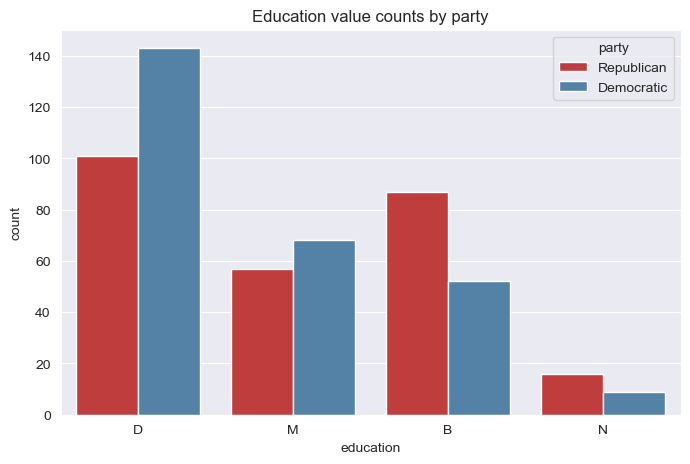

In [43]:
plt.rcParams["figure.figsize"] = [8, 5]
party_colors = ['tab:red', 'steelblue']
sns.countplot(data = congress, x = 'education', hue = 'party', order = ['D', 'M', 'B', 'N'], palette = party_colors)
plt.title('Education value counts by party');

#### 5.1.3 Age <a class = "anchor" id = "eda_age"></a>

Additionally, we conducted an exploratory analysis of age. Congress was, on average, 59 years old, with a minimum of 25 years old and a maximum of 87 years old.

In [44]:
congress['age_start'].describe()

count    533.000000
mean      58.754221
std       11.889276
min       25.000000
25%       50.000000
50%       59.000000
75%       67.000000
max       87.000000
Name: age_start, dtype: float64

Based on the histogram below, we see that the distribution of age is close to normally distributed. In addition, the box plots show that the median age for Democratics is slightly higher than that of Republicans.

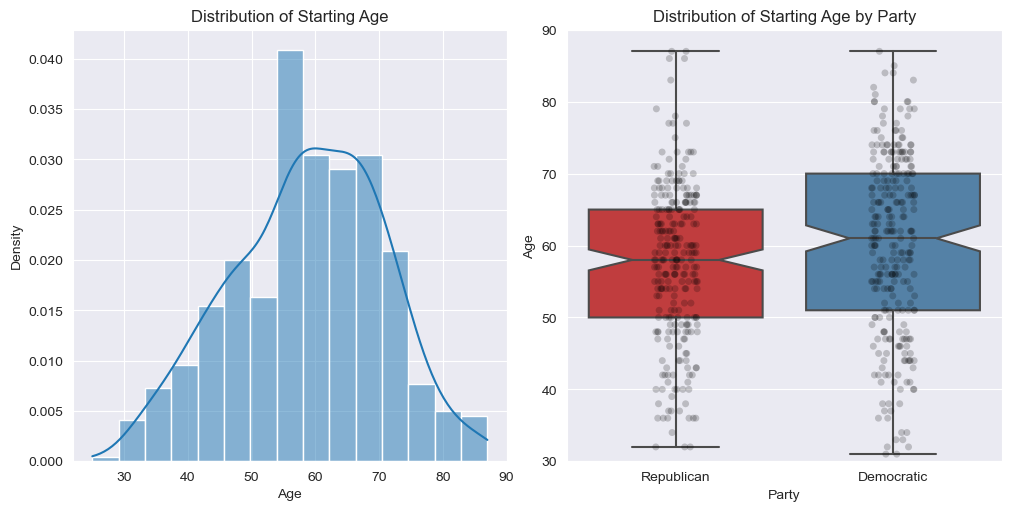

In [45]:
plt.rcParams["figure.figsize"] = [10, 5]
_, ax = plt.subplots(1,2, constrained_layout=True)
sns.histplot(data = congress, ax = ax[0], x = 'age_start', stat='density', kde = True).set_title('Distribution of Starting Age')
party_colors = ['tab:red', 'steelblue']
sns.boxplot(data= congress, ax = ax[1], x = 'party', y='age_start', notch=True, palette = party_colors).set_title('Distribution of Starting Age by Party')
sns.stripplot(data= congress, ax = ax[1], x = 'party', y='age_start', marker="o", alpha=0.2, color="black")
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Party')
ax[1].set_ylabel('Age')
ax[1].set_ylim([30,90]);

### 5.2 Exploratory Data Analysis on Twitter Data <a class = "anchor" id = "eda_twitter"></a>

#### 5.2.1 Number of Tweets Containing Outlinks per Day <a class = "anchor" id = "number_tweets"></a>

In [46]:
twt_freq = twitter.Date.value_counts().to_frame()
twt_freq = twt_freq.sort_index(axis=0)
twt_freq = twt_freq.rename(columns={'Date': 'Frequency'})
twt_freq.index = pd.to_datetime(twt_freq.index).date

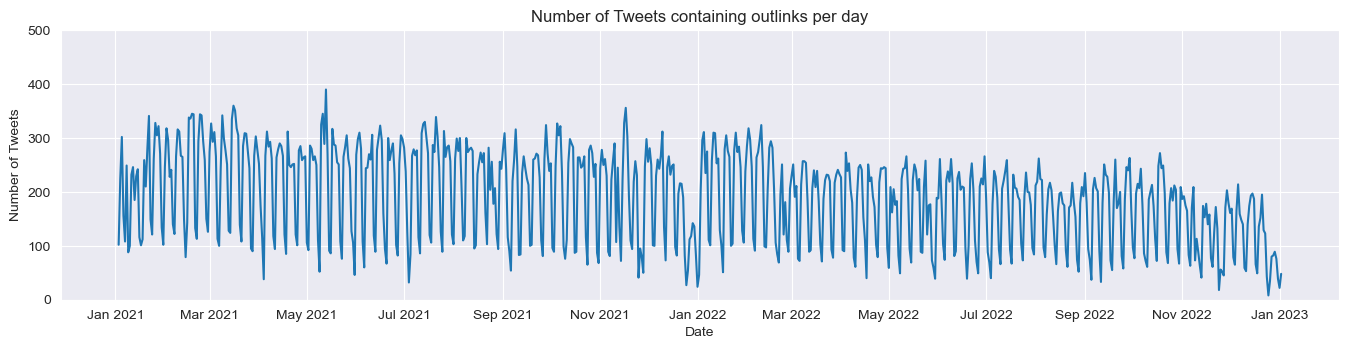

In [47]:
plt.rcParams["figure.figsize"] = [16.50, 3.50]
_, ax = plt.subplots(1,1)
sns.lineplot(data=twt_freq)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.set_title('Number of Tweets containing outlinks per day')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.get_legend().remove()
ax.set_ylim(0,500);

We can see that the trend in number of tweets has remained relatively constant over time.

Interestingly, we observe a decrease in the number of tweets between the end of December and the beginning of January. This may suggest that congresspersons are less inclined to tweet during the winter holidays.

#### 5.2.2 Top 20 Domains Tweeted <a class = "anchor" id = "top_20_domains"></a>

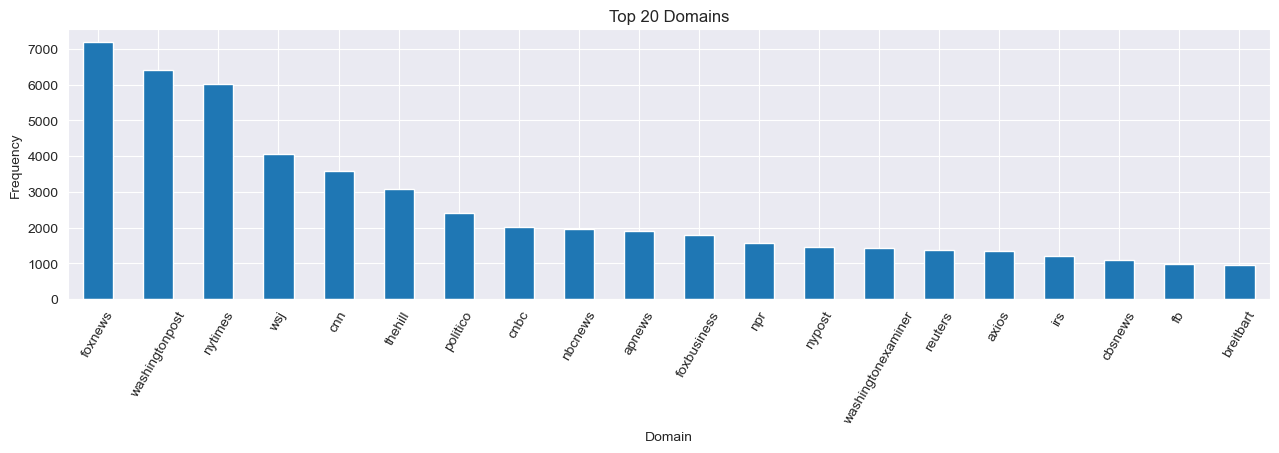

In [48]:
plt.rcParams["figure.figsize"] = [15.50, 3.50]
twitter.Domain.value_counts(ascending=False).to_frame().head(20).plot(kind = 'bar', legend = None)
plt.xlabel('Domain')
plt.ylabel('Frequency')
plt.title('Top 20 Domains')
plt.tick_params(axis='x', rotation=60);

The top three most frequent domains among these outlinks are `foxnews`, `washingtonpost`, and `nytimes`. Notably, these are major national news sources in the United States.

#### 5.2.3 Top 20 Usernames of Congresspersons by Number of Domains Tweeted <a class = "anchor" id = "top_20_usernames"></a>

In [49]:
congress_copy = congress.rename(columns={'handle': 'Username'})

# merge the dataframes 
merged_df = pd.merge(twitter, congress_copy, on='Username')

# group the merged dataframe by 'Username' and count the number of tweets for each user
# Sort in descending order and retrieve the top 20 users
top_20_users = merged_df.groupby('Username')['Domain'].count().reset_index(name='count').sort_values('count', ascending=False).head(20)

# add a column to the top_20_users dataframe to indicate the party of each user
group_dict = dict(zip(congress_copy['Username'], congress_copy['party']))
top_20_users['party'] = top_20_users['Username'].map(group_dict)
top_20_users.head()

,Username,count,party
20,CongressmanRaja,2992,Democratic
47,JohnCornyn,2567,Republican
223,RepJayapal,1907,Democratic
493,auctnr1,1803,Republican
452,SenWhitehouse,1617,Democratic


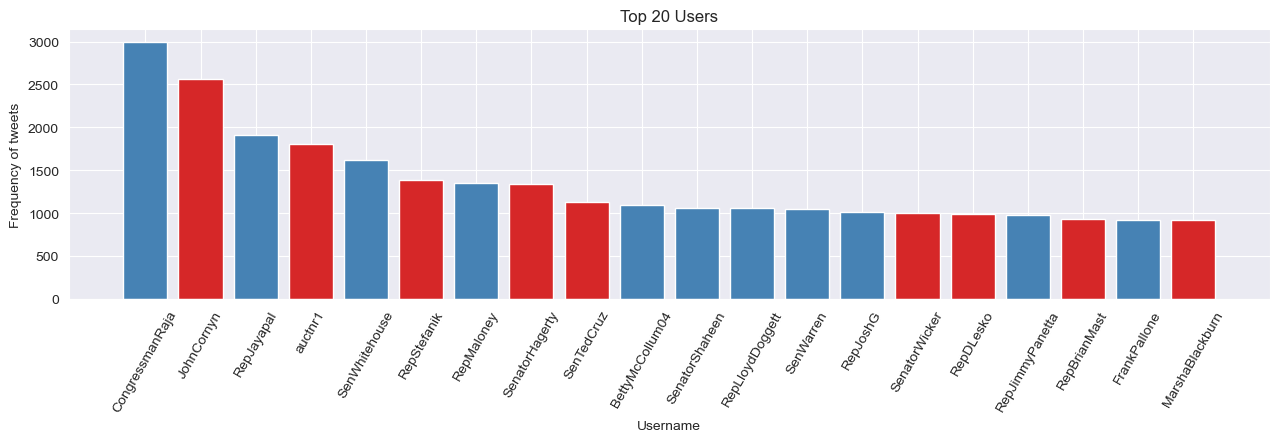

In [50]:
colors = {'Democratic': 'steelblue', 'Republican': 'tab:red'}

# create a bar plot
plt.bar(top_20_users['Username'], top_20_users['count'], color=[colors[i] for i in top_20_users['party']])
plt.xlabel('Username')
plt.ylabel('Frequency of tweets')
plt.title('Top 20 Users')
plt.tick_params(axis='x', rotation=60)
plt.show()

The colour of the bars indicate which party each user is affiliated with.

Representative Raja Krishnamoorthi of the Democratic Party, Senator John Cornyn of the Republican Party, and Representative Pramila Jayapal of the Democratic Party provided the most outlinks.

## 5.3 Matrix Visualisation <a class = "anchor" id = "matrix"></a>

### 5.3.1 Matrix Visualisation by Frequency <a class = "anchor" id = "matrix_frequency"></a>

We created a matrix of specifying the frequency of tweets from each domain by each congressperson.

In [51]:
matrix_raw = twitter.pivot_table(index = 'Username', columns = 'Domain', aggfunc = len, fill_value = 0)
matrix_raw.columns = matrix_raw.columns.levels[1]
matrix_raw.head()

Domain,1,100noticias,1010wcsi,1011fmtheanswer,1011now,1012industryreport,1041theranch,1063thegroove,10best,10ksbapply,...,zd,zerohedge,zerotothrive,zillow,zn,zocdoc,zoom,zoomgov,zufallhealth,zurl
Username,,,,,,,,,,,,,,,,,,,,,
AlLawsonJr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AustinScottGA08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BenCardinforMD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BennieGThompson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BettyMcCollum04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This dimensions of this matrix is `522 rows × 9234 columns`. As the dimensions of the matrix are large, we have decided to filter the matrix to US congrepsspersons who have at least 100 or more tweet in one domain for improved visualization and more meaningful analysis.

In [52]:
row_indices, col_indices = np.where(matrix_raw >= 100)
matrix_filtered = matrix_raw.iloc[row_indices, col_indices].drop_duplicates().T.drop_duplicates()
matrix_filtered.head()

Username,BettyMcCollum04,CongressmanRaja,FrankPallone,HawleyMO,Jim_Jordan,JohnCornyn,LindseyGrahamSC,MarshaBlackburn,RepAndyBiggsAZ,RepAngieCraig,...,SenJoniErnst,SenTedCruz,SenWarren,SenWhitehouse,SenatorHagerty,SenatorShaheen,SenatorTimScott,SenatorWarnock,SenatorWicker,auctnr1
Domain,,,,,,,,,,,,,,,,,,,,,
startribune,234,0,0,0,0,0,0,0,0,104,...,0,0,0,0,0,0,0,0,0,0
twincities,177,0,0,0,0,0,0,0,0,13,...,0,0,0,0,0,0,0,0,0,0
chicagotribune,0,193,0,0,0,4,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
cnn,13,214,10,3,5,18,8,4,1,22,...,7,34,56,67,23,25,15,10,9,69
dailyherald,0,192,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, `matrix_filtered` has dimensions of `35 rows × 38 columns`.

Below is a heatmap of the aforementioned matrix showing the distribution of domains and usernames.

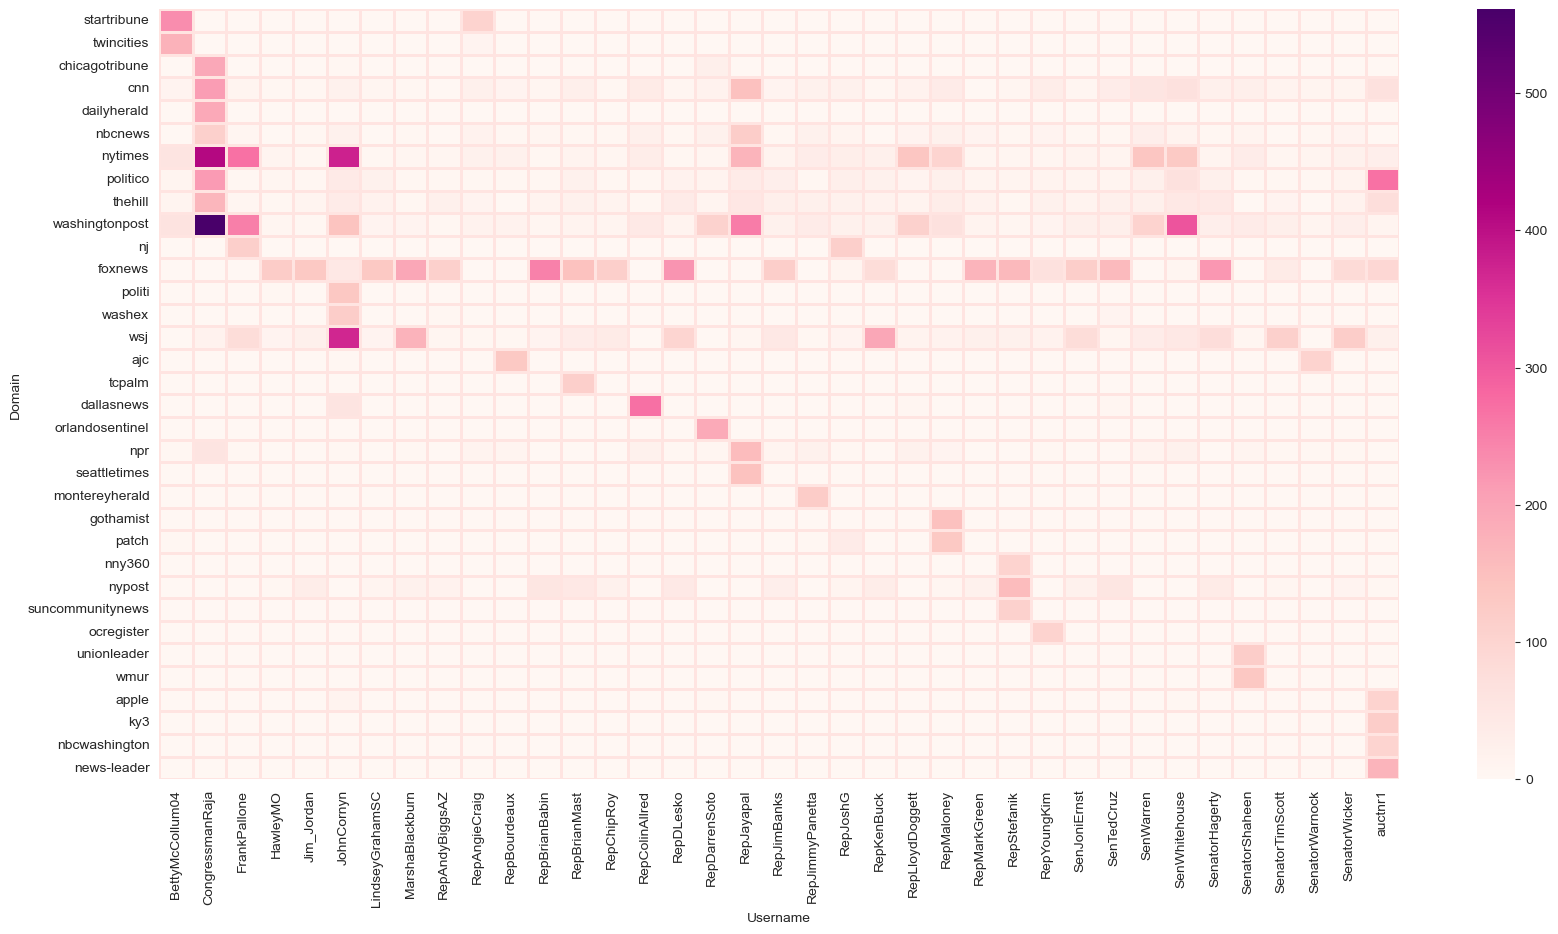

In [53]:
plt.figure(figsize = (20, 10))
sns.heatmap(matrix_filtered, annot = False, cmap = 'RdPu', linewidths = 1, linecolor = 'mistyrose');

We observe that some usernames take their links primarily from one source, while others draw their links from numerous sources. For example, we see that Representative Raja Krishnamoorthi from the Democratic party uses a variety of sources from `washingtonpost`, `thehill`, `politico`,  `nytimes`, `nbcnews`, `dailyherald`, and `chicagotribune`. Senator Marsha Blackburn from the Republican party, however, mainly relies on `foxnews` and `wsj` for her information.

### 5.3.2 Matrix Visualisation by Preference <a class = "anchor" id = "matrix_preference"></a>

Now, we create a binary matrix where each cell is `1` if the username has tweeted using the domain, and `0` otherwise.

In [54]:
matrix_binary = pd.DataFrame(np.where(matrix_filtered > 0, 1, 0), index = matrix_filtered.index, columns = matrix_filtered.columns)
matrix_binary.head()

Username,BettyMcCollum04,CongressmanRaja,FrankPallone,HawleyMO,Jim_Jordan,JohnCornyn,LindseyGrahamSC,MarshaBlackburn,RepAndyBiggsAZ,RepAngieCraig,...,SenJoniErnst,SenTedCruz,SenWarren,SenWhitehouse,SenatorHagerty,SenatorShaheen,SenatorTimScott,SenatorWarnock,SenatorWicker,auctnr1
Domain,,,,,,,,,,,,,,,,,,,,,
startribune,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
twincities,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chicagotribune,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
cnn,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
dailyherald,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We use spectral co-clustering to simultaneously cluster the usernames and the domains.

The spectral co-clustering algorithm is as follows:

$ \tilde{W} = D_L^{-\frac{1}{2}} W D_R^{-\frac{1}{2}} $, with $ (D_L)_{i, i} = \sum_{j \in R} w_{i, j} $ and $ (D_R)_{j, j} = \sum_{i \in L} w_{i, j} $

In [55]:
# convert the matrix to a numpy array
W = matrix_binary.to_numpy()

# calculate the row sum
d_l = W.sum(axis = 1)

# calculate the column sum
d_r = W.sum(axis = 0)

# implement the spectral co-clustering algorithm above
tW = np.diag(1 / np.sqrt(d_l)) @ W @ np.diag(1 / np.sqrt(d_r))

In [56]:
# obtain the singular values and the corresponding of singular vectors of W
u, s, vt = np.linalg.svd(tW)

In [57]:
# sort the left and right singular vectors according to the singular value s
idx = np.argsort(-s)
s = s[idx]
u = u[:, idx]
v = vt[idx, :].T

In [58]:
# obtain u_2 and v_2
u_2 = u[:, 1:2]
v_2 = v[:, 1:2]

$ z_2 =
\begin{bmatrix}
D_L^{-\frac{1}{2}} u_2 \\
D_R^{-\frac{1}{2}} v_2
\end{bmatrix}
$

In [59]:
z_2 = np.vstack([np.diag(1 / np.sqrt(d_l)) @ u_2, np.diag(1 / np.sqrt(d_r)) @ v_2])

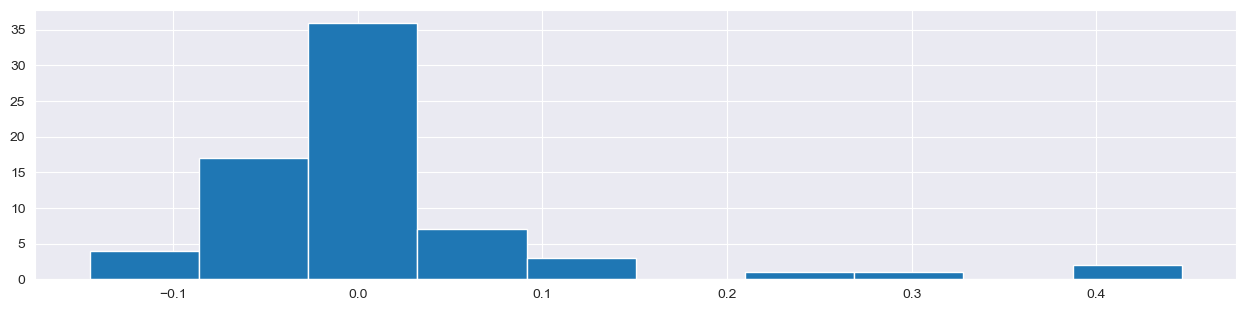

In [60]:
plt.hist(z_2);

Next, we perform k-means clustering.

In [61]:
# obtain the k-means
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(z_2)
labels = kmeans.labels_

In [62]:
# get the clusterings for both L and R
m, n = W.shape
row_labels = labels[:m]
column_labels = labels[-n:]

In [63]:
# reorder the matrix based on the predicted groups for rows and columns
row_idx = np.argsort(row_labels)
col_idx = np.argsort(column_labels)
ordered_W = W[row_idx][:, col_idx]

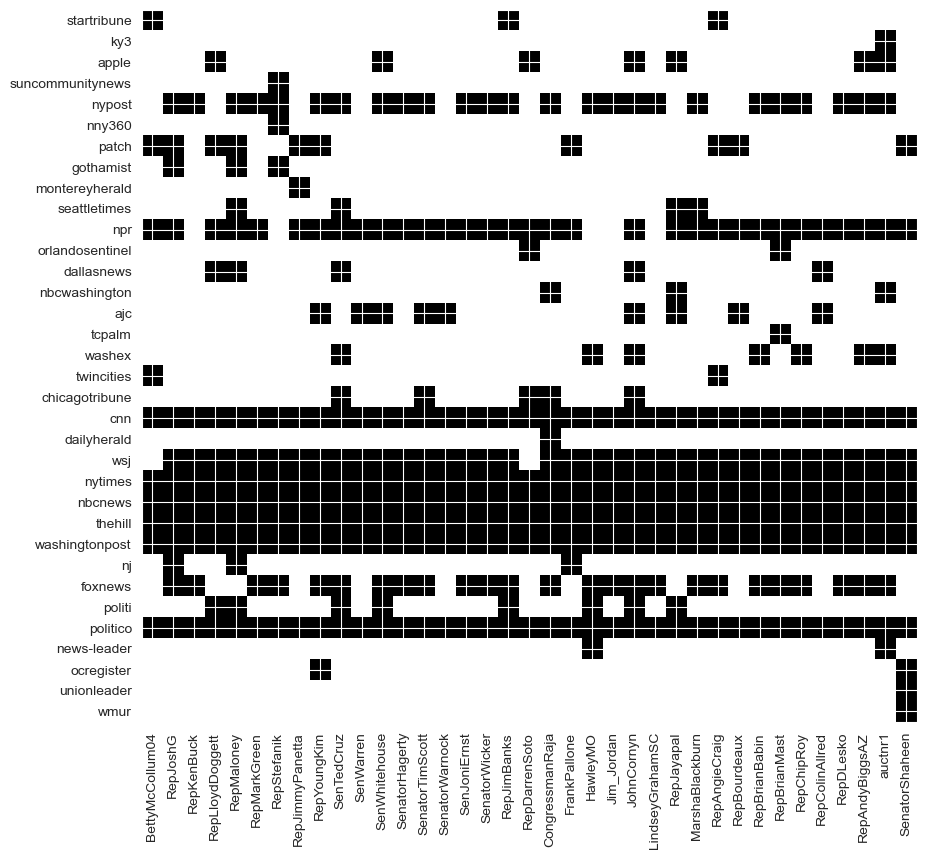

In [64]:
# visualise the reordered matrix
plt.figure(figsize = (10, 10))
plt.imshow(ordered_W, cmap = plt.cm.gray_r)
plt.yticks(np.arange(0, len(matrix_binary.index)), matrix_binary.index[row_idx])
plt.xticks(np.arange(0, len(matrix_binary.columns)), matrix_binary.columns[col_idx], rotation = 90);

Notably, the k-means clustering shows little clustering between domains and US congresspersons. In other words, US congresspersons tend to use domains independently from each other. This may suggest that US congresspersons choose sources based on their own preferences rather than posting from news sources based on activities of other congresspersons. However, as this is a selected, smaller, filtered matrix than the orignial main matrix, a lot of information has been lost. Therefore, this clustered matrix does not fully represent the original data.

## 6. Creating a Database using SQL <a class = "anchor" id = "sql"></a>

We create the database `congress.db`. We then store tables created from the two existing dataframes inside the database. The SQL table for the characteristics and demogrpahics of the US congresspersons was named `congress` and the Twitter outlinks table was named `twitter`. We used the twitter handles as the primary key to connect the two SQL tables. 

In [65]:
# function to display our dataframes side by side
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(
        html_str.replace('table','table style="display:inline"'), 
        raw=True
    )

In [66]:
congress = pd.read_csv('data/117th_congress_with_handles.csv', index_col = 0)
twitter = pd.read_csv('data/twt_df_filtered.csv', index_col = 0)

In [67]:
con = sqlite3.connect("data/congress.db") 

In [68]:
con.execute('PRAGMA foreign_keys = ON;'); 

In [69]:
# create table for twitter data
con.execute('DROP TABLE IF EXISTS twitter;')
con.execute('''CREATE TABLE twitter(
               Date FLOAT,
               Username TEXT,
               Domain TEXT NOT NULL);''')
con.commit();

In [70]:
# insert data into the 'twitter' table
for index, row in twitter.iterrows():
    
    con.execute("INSERT INTO twitter VALUES(?, ?, ?);", [row[0], row[1], row[2]]);
    
con.commit();

In [71]:
twitter = pd.read_sql('SELECT * from twitter', con)

In [72]:
# create a table for congress data
con.execute('DROP TABLE IF EXISTS congress;')
con.execute('''CREATE TABLE congress(
               title TEXT,
               name TEXT,
               handle TEXT,
               party TEXT,
               state TEXT,
               district TEXT,
               elected FLOAT,
               'vote_share (%)' FLOAT,
               age_start FLOAT, 
               education TEXT, 
               end_service FLOAT,
               PRIMARY KEY(handle));''')
con.commit();

In [73]:
# insert data into the 'congress' table
for index, row in congress.iterrows():
    
    con.execute("INSERT or IGNORE INTO congress VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", [row[0], row[1], row[2], 
                                                                                            row[3], row[4], row[5], 
                                                                                            row[6], row[7], row[8], 
                                                                                            row[9], row[10]]);
    
con.commit();

In [74]:
congress = pd.read_sql('SELECT * from congress', con)

In [75]:
twitter = pd.read_sql('SELECT * FROM twitter', con)

## 7. Calculation of Lean Value <a class = "anchor" id = "lean"></a>

Moreover, we created a new variable called `lean` to better understand bias in the context of news sources.

$$ \text{lean} = \frac{\text{number of Republican congresspersons} - \text{number of Democratic congresspersons}}{\text{number of Republican congresspersons} + \text{number of Democratic congresspersons}} $$

`lean` is defined as the normalised ratio of the number of Republican congresspersons who used the news source compared to the number of Democratic congresspersons. `lean` is normalised between -1.00 and +1.00 and a source with a `lean` of -1.00 means that it is more Democratic-leaning, while a source with a +1.00 indicates that it is more Republican-leaning.

Each congressperson was then assigned a `mean_lean` value by taking the average of the `lean` values across all news sources that they used. In addition, there were missing values of `mean_lean` for some congresspersons. This is due to a few reasons. They did not tweet during their service in the 117th Congress, their accounts are currently deactivated, or their tweets did not contain any outlinks. As described below, we used the variable `lean` and `mean_lean` in subsequent analyses when assessing the relationship between bias in news sources and party affiliation, as well as other factors.

In [76]:
result = con.execute('''SELECT party, Domain, count(Domain) as countDomain
                        FROM twitter
                            INNER JOIN congress
                                ON twitter.Username = congress.handle
                        GROUP BY Domain, party''').fetchall()

result_df = pd.DataFrame(result, columns = ['party', 'Domain', 'Domain_Count'])
result_df = result_df.sort_values(by=['Domain_Count'], ascending=False)
domain_party = result_df.pivot_table(index = 'Domain', columns = 'party', values = 'Domain_Count')
domain_party = domain_party.reset_index(drop = False).rename_axis(None, axis = 1)
domain_party = domain_party.fillna(0)

In [77]:
domain_lean = pd.DataFrame()
domain_lean['Domain'] = domain_party['Domain']
domain_lean['Lean'] = (domain_party['Republican'] - domain_party['Democratic']) / (domain_party['Republican'] + domain_party['Democratic'])
domain_lean

,Domain,Lean
0,1,-1.000000
1,100noticias,1.000000
2,1010wcsi,1.000000
3,1011fmtheanswer,1.000000
4,1011now,1.000000
...,...,...
9228,zocdoc,-1.000000
9229,zoom,-0.488372
9230,zoomgov,-1.000000
9231,zufallhealth,-1.000000


In [78]:
# without lean values of -1 and 1
domain_lean[(domain_lean['Lean'] != -1) & (domain_lean['Lean'] != 1)].sort_values(by = 'Lean')

,Domain,Lean
7360,studentaid,-0.993506
8184,unionleader,-0.992424
3352,healthcare,-0.990741
3167,gothamist,-0.987730
6947,seacoastonline,-0.984252
...,...,...
2991,fxn,0.987500
5232,nationalreview,0.990307
7701,thefederalist,0.991968
7999,townhall,0.993569


In [79]:
lean = []
for i in tqdm(range(len(twitter))):
    domain = twitter.loc[i, 'Domain']
    lean.append(domain_lean.loc[domain_lean['Domain'] == domain, 'Lean'].to_list()[0])
twitter['Lean'] = lean

100%|█████████████████████████████████| 139711/139711 [01:26<00:00, 1619.11it/s]


In [80]:
# calculate the mean of the lean values by username
username_lean = twitter.groupby('Username')[['Lean']].mean().reset_index(drop = False).sort_values(by = 'Lean').reset_index(drop = True)

In [81]:
mean_lean = []
for i in range(len(congress)):
    handle = congress.loc[i, 'handle']
    if handle in list(username_lean['Username']):
        mean_lean.append(username_lean.loc[username_lean['Username'] == handle, 'Lean'].to_list()[0])
    else:
        mean_lean.append(np.nan)
congress['mean_lean'] = mean_lean

In [82]:
congress[congress['mean_lean'].isna()]

,title,name,handle,party,state,district,elected,vote_share (%),age_start,education,end_service,mean_lean
64,Senator,Richard Burr,SenatorBurr,Republican,North Carolina,None,2016.0,51.1,65.0,B,03/01/2023,NaN
142,Representative,Devin Nunes,RepDevinNunes,Republican,California,22,NaN,54.2,47.0,M,01/01/2022,NaN
206,Representative,Alcee Hastings,RepHastingsFL,Democratic,Florida,20,NaN,78.7,84.0,D,06/04/2021,NaN
274,Representative,Cedric Richmond,RepRichmond,Democratic,Louisiana,2,NaN,63.6,47.0,D,15/01/2021,NaN
319,Representative,Trent Kelly,RepTrentKelly,Republican,Mississippi,1,NaN,68.8,54.0,D,03/01/2023,NaN
344,Representative,Chris Smith,None,Republican,New Jersey,4,NaN,59.9,67.0,B,03/01/2023,NaN
348,Representative,Albio Sires,RepSires,Democratic,New Jersey,8,NaN,74.0,69.0,M,03/01/2023,NaN
402,Representative,Bob Gibbs,RepBobGibbs,Republican,Ohio,7,NaN,67.5,66.0,N,03/01/2023,NaN
410,Representative,Steve Stivers,RepSteveStivers,Republican,Ohio,15,NaN,63.4,55.0,M,16/05/2021,NaN
411,Representative,Anthony Gonzalez,RepAGonzalez,Republican,Ohio,16,NaN,63.2,36.0,M,03/01/2023,NaN


## 8. Q1: Based on the party affiliation of the US politicians, are there differences in the preferences of news sites based on the domains they tweet? <a class = "anchor" id = "q1"></a>

In this section, we aim to estimate the relationship between domains tweeted and political party - Democratic or Republican. Below is a graph displaying the counts of the top 10 domains for each party. Furthermore, we calculated the proportion of each domain used per party affiliation.

In [83]:
result_party = con.execute('''SELECT party, Domain, count(Domain) as countDomain
                              FROM twitter
                                  INNER JOIN congress
                                      ON twitter.Username = congress.handle
                              GROUP BY Domain, party''').fetchall()

result_df_party = pd.DataFrame(result_party, columns = ['party', 'Domain', 'Domain_Count'])

result_df_party = result_df_party.sort_values(by=['Domain_Count'], ascending=False)

result_df_party_pivot = result_df_party.pivot_table(index = 'Domain', columns = 'party', values = 'Domain_Count', aggfunc = 'sum')

result_df_party_pivot_democratic = result_df_party_pivot.sort_values(by=['Democratic'], ascending=False)
result_df_party_pivot_republican = result_df_party_pivot.sort_values(by=['Republican'], ascending=False)

display_side_by_side(result_df_party_pivot_democratic.head(), result_df_party_pivot_republican.head())

party,Democratic,Republican
Domain,,
washingtonpost,5265.0,1161.0
nytimes,4912.0,1120.0
cnn,2741.0,836.0
thehill,1694.0,1392.0
nbcnews,1536.0,427.0
party,Democratic,Republican
Domain,,
foxnews,95.0,7092.0
wsj,604.0,3467.0


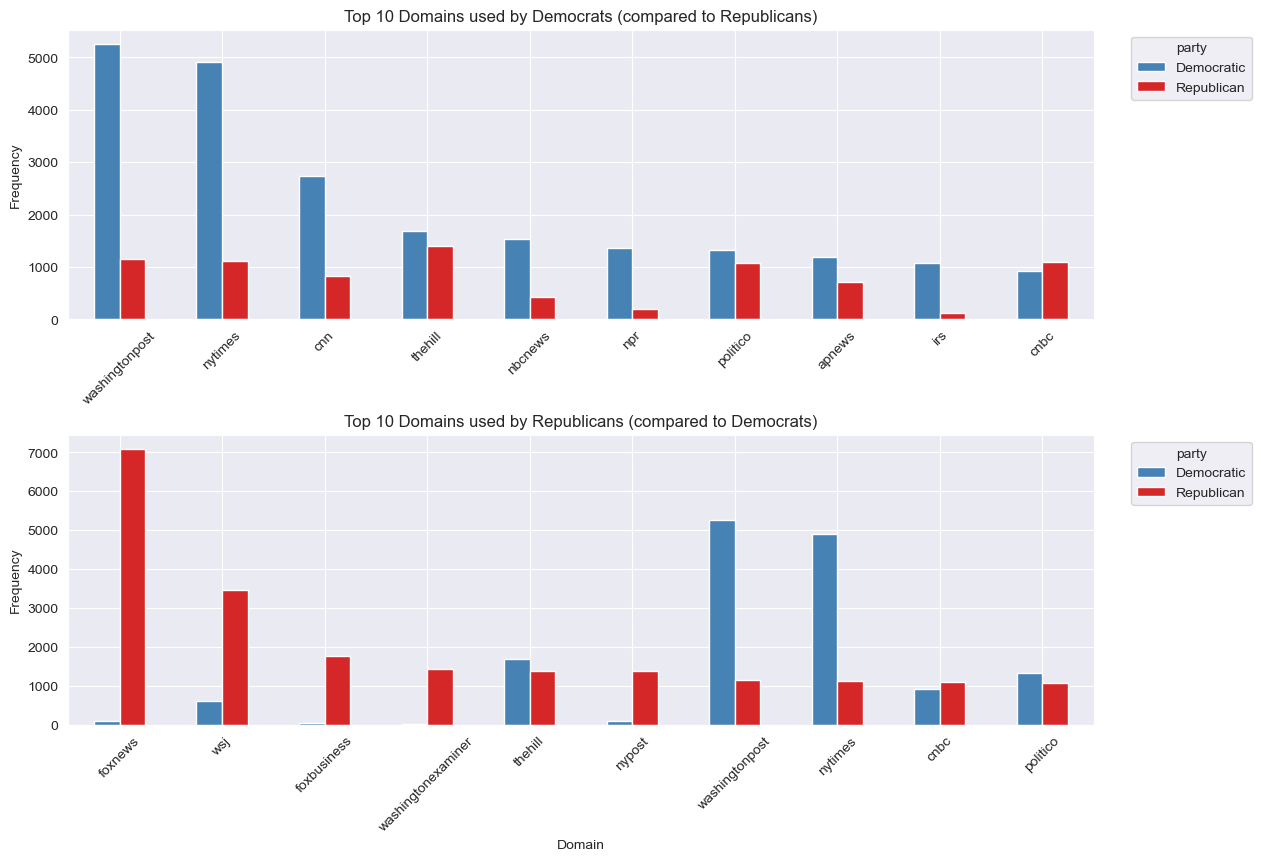

In [84]:
_, ax = plt.subplots(2,1, figsize = (12.50, 8.50), constrained_layout=True)
party_colors = ['steelblue', 'tab:red']
result_df_party_pivot.sort_values(by=['Democratic'], ascending=False).head(10).plot(ax = ax[0], kind='bar', color = party_colors)
result_df_party_pivot.sort_values(by=['Republican'], ascending=False).head(10).plot(ax = ax[1], kind='bar', color = party_colors)
ax[0].set(xlabel=None)
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
ax[0].set(ylabel = 'Frequency')
ax[1].set(ylabel = 'Frequency')
ax[0].title.set_text('Top 10 Domains used by Democrats (compared to Republicans)')
ax[1].title.set_text('Top 10 Domains used by Republicans (compared to Democrats)')
sns.move_legend(ax[0], "upper left", bbox_to_anchor=(1.03, 1))
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(1.03, 1))

Our results demonstrate that we can see a few common domains used frequently by both parties. These are: `washingtonpost`, `nytimes`, `twitter`, and `thehill`. Notably, while the most frequently used domain by Democrats, `washingtonpost`, is also in the Top 10 for Republicans, the most frequently used domain by Republicans, `foxnews`, is not even present in the Top 50 for Democrats. This might suggest that `foxnews` has conservative bias.

In [85]:
# make columns for proportion of frequencies
result_df_party_pivot_democratic['Democratic_ratio'] = result_df_party_pivot['Democratic']/result_df_party_pivot['Democratic'].sum()
result_df_party_pivot_democratic['Republican_ratio'] = result_df_party_pivot['Republican']/result_df_party_pivot['Republican'].sum()
result_df_party_pivot_republican['Democratic_ratio'] = result_df_party_pivot['Democratic']/result_df_party_pivot['Democratic'].sum()
result_df_party_pivot_republican['Republican_ratio'] = result_df_party_pivot['Republican']/result_df_party_pivot['Republican'].sum()

In [86]:
display(result_df_party_pivot_democratic.head())
display(result_df_party_pivot_republican.head())

party,Democratic,Republican,Democratic_ratio,Republican_ratio
Domain,,,,
washingtonpost,5265.0,1161.0,0.067253,0.018901
nytimes,4912.0,1120.0,0.062744,0.018234
cnn,2741.0,836.0,0.035013,0.013610
thehill,1694.0,1392.0,0.021639,0.022662
nbcnews,1536.0,427.0,0.019620,0.006952


party,Democratic,Republican,Democratic_ratio,Republican_ratio
Domain,,,,
foxnews,95.0,7092.0,0.001213,0.115458
wsj,604.0,3467.0,0.007715,0.056443
foxbusiness,33.0,1754.0,0.000422,0.028555
washingtonexaminer,16.0,1422.0,0.000204,0.023150
thehill,1694.0,1392.0,0.021639,0.022662


According to the proportion of each domain used by each party, we observe that the top domain `washingtonpost` is used by around 6.1% of Democratic congresspersons. Meanwhile, 11% of Republican congresspersons utilise the top domain for Republicans, `foxnews`.

## 9. Q2:   Does state representation and party affiliation among US congresspersons affect the preferences of domains in Twitter outlinks? <a class = "anchor" id = "q2"></a>

Based on the state of residence, we observed the preference in domains for each party affiliation. The most frequently used domain for each state by party is provided in the dataframe `result_df_state_pivot`. 

In [87]:
pd.set_option('display.max_rows', 10)
result_state = con.execute('''WITH StateRecord AS (
                                  SELECT state, party, Domain, count(Domain) as countDomain
                                  FROM twitter
                                      INNER JOIN congress
                                          ON twitter.Username = congress.handle
                                  GROUP BY Domain, party, state)
                              SELECT state, party, Domain, countDomain
                              FROM StateRecord
                                INNER JOIN (
                                    SELECT Domain, party, state, Max(countDomain) as countDomainMax
                                    FROM StateRecord
                                    GROUP BY state, party)
                                USING(Domain, party, state)
                              WHERE countDomain = countDomainMax''').fetchall()

result_df_state = pd.DataFrame(result_state, columns = ['state', 'party', 'Domain', 'Domain_Count'])
result_df_state.sort_values(by=['state'])

,state,party,Domain,Domain_Count
3,Alabama,Democratic,al,40
13,Alabama,Republican,foxnews,211
1,Alaska,Republican,adn,50
4,Arizona,Democratic,azcentral,213
14,Arizona,Republican,foxnews,364
...,...,...,...,...
71,West Virginia,Democratic,vaccines,6
43,West Virginia,Republican,foxnews,67
47,Wisconsin,Democratic,jsonline,77
44,Wisconsin,Republican,foxnews,113


In [88]:
result_df_state_pivot = result_df_state.pivot_table(index = ['state'], columns = ['party'], values = ['Domain'], aggfunc=lambda x: ' '.join(str(v) for v in x))
result_df_state_pivot.columns = result_df_state_pivot.columns.droplevel(0)
result_df_state_pivot

party,Democratic,Republican
state,,
Alabama,al,foxnews
Alaska,NaN,adn
Arizona,azcentral,foxnews
Arkansas,NaN,foxnews
California,nytimes,foxnews
...,...,...
Virginia,washingtonpost,foxnews
Washington,seattletimes,tri-cityherald
West Virginia,vaccines,foxnews


In [89]:
result_df_state_pivot['Democratic'].unique()

array(['al', nan, 'azcentral', 'nytimes', 'denverpost', 'washingtonpost',
       'orlandosentinel', 'ajc', 'staradvertiser', 'nwitimes',
       'desmoinesregister', 'kansascity', 'courier-journal',
       'pressherald', 'detroitnews', 'startribune', 'mississippitoday',
       'billingsgazette', 'reviewjournal', 'wmur', 'abqjournal',
       'newsobserver', 'inquirer', 'postandcourier', 'dallasnews', 'wapo',
       'seattletimes', 'vaccines', 'jsonline'], dtype=object)

In [90]:
result_df_state_pivot['Republican'].unique()

array(['foxnews', 'adn', 'wsj', nan, 'bangordailynews', 'google', 'omaha',
       'kkoh', 'deseret', 'tri-cityherald'], dtype=object)

Above are the lists of unique domains that appear in the `result_df_state_pivot` dataframe for each party.

Based on the lists, we find that Democrats use a greater number of news sources than Republicans, which may suggest that Democrats are less biased in their selection of news sources.

### 9.1 Scatter Plot of the Lean Value of the Most Used Domain of Each State by Party <a class = "anchor" id = "q2_plot1"></a>

In order to visualise the `result_df_state_pivot` dataframe, we first replace the names of the domains by their respective assigned leans (from the `domain_lean` dataframe found earlier). We then create a Scatter plot of the leans against each state. 

In [91]:
result_df_state_pivot['Democratic'] = result_df_state_pivot['Democratic'].replace(domain_lean.set_index('Domain')['Lean'])
result_df_state_pivot['Republican'] = result_df_state_pivot['Republican'].replace(domain_lean.set_index('Domain')['Lean'])
result_df_state_pivot.reset_index(inplace = True)
result_df_state_pivot

party,state,Democratic,Republican
0,Alabama,0.186992,0.973563
1,Alaska,NaN,0.774194
2,Arizona,-0.757085,0.973563
3,Arkansas,NaN,0.973563
4,California,-0.628647,0.973563
...,...,...,...
45,Virginia,-0.638655,0.973563
46,Washington,-0.927007,0.701493
47,West Virginia,-0.956204,0.973563
48,Wisconsin,-0.504762,0.973563


In [92]:
dem = pd.to_numeric(result_df_state_pivot['Democratic'], errors = 'coerce')
rep = pd.to_numeric(result_df_state_pivot['Republican'], errors = 'coerce')

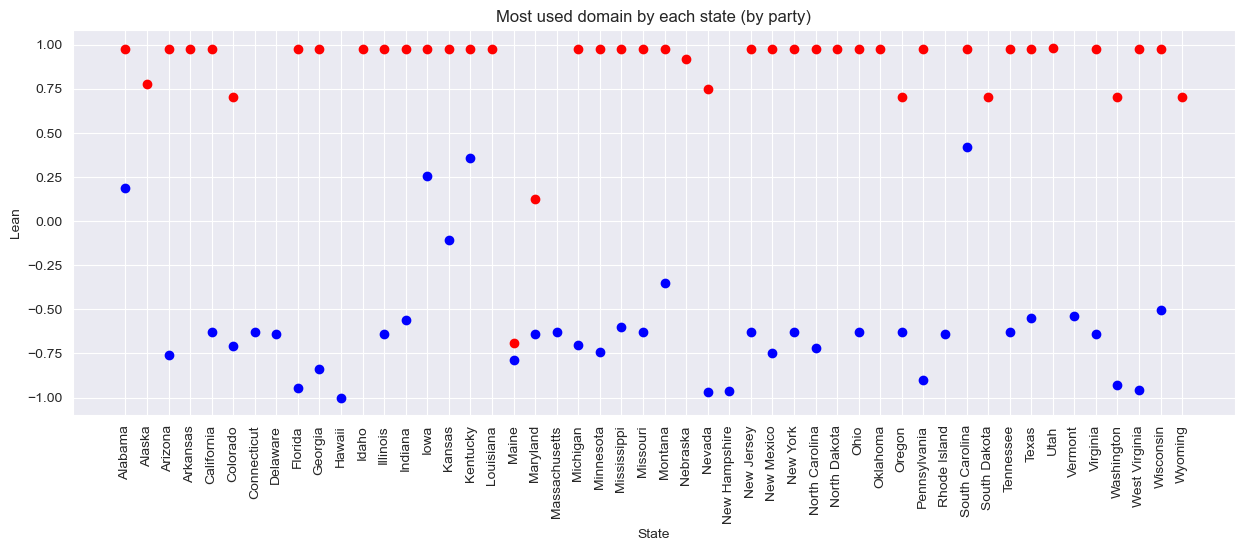

In [93]:
plt.figure(figsize = (15, 5))
plt.scatter(result_df_state_pivot['state'], dem, c = 'blue')
plt.scatter(result_df_state_pivot['state'], rep, c = 'red')
plt.xticks(rotation = 90)
plt.xlabel('State')
plt.ylabel('Lean')
plt.title('Most used domain by each state (by party)')
plt.show()

Interestingly, we observe an outlier for the Republican congresspersons in Maine. In particular, the Republican congresspersons in Maine used relatively more Democratic leaning news sources (ie. negative `lean` value).

### 9.2 Scatter Plot of the Individual Mean Lean Values by State <a class = "anchor" id = "q2_plot2"></a>

Additionally, we examined the `mean_lean` of each congressperson within each state according to his or her party affiliation. Finally, we ranked states from most negative (Democratic-leaning) to positive (Republican-leaning) `mean_lean` value.

100%|████████████████████████████████████████| 533/533 [00:00<00:00, 669.49it/s]


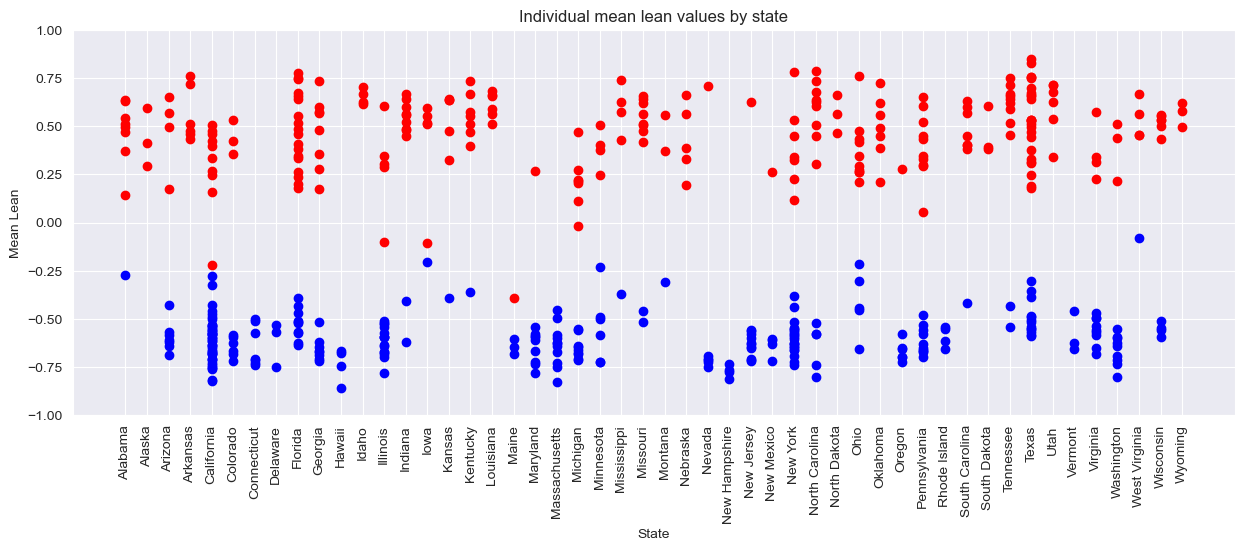

In [94]:
plt.figure(figsize = (15, 5))
for i in tqdm(range(len(congress))):
    if pd.isna(congress.loc[i, 'mean_lean']):
        pass
    else:
        if congress.loc[i, 'party'] == 'Democratic':
            plt.scatter(congress.loc[i, 'state'], congress.loc[i, 'mean_lean'], c = 'blue')
        if congress.loc[i, 'party'] == 'Republican':
            plt.scatter(congress.loc[i, 'state'], congress.loc[i, 'mean_lean'], c = 'red')
plt.xticks(rotation = 90)
plt.xlabel('State')
plt.ylabel('Mean Lean')
plt.title('Individual mean lean values by state')
plt.ylim([-1, 1]);

We observe that, in general, the congresspersons are partisan in their choices of domain since the colours indicating party-affiliation rarely overlap. Furthermore, there are no Demoratic congresspersons with `mean_lean` values above `0` but there are several Republican congresspersons with `mean_leans` values above `0`.

### 9.3 Scatter Plot of the Average Mean Lean Values by State <a class = "anchor" id = "q2_plot3"></a>

In [95]:
state_lean = congress.groupby('state')[['mean_lean']].mean().sort_values(by = 'mean_lean').reset_index(drop = False)

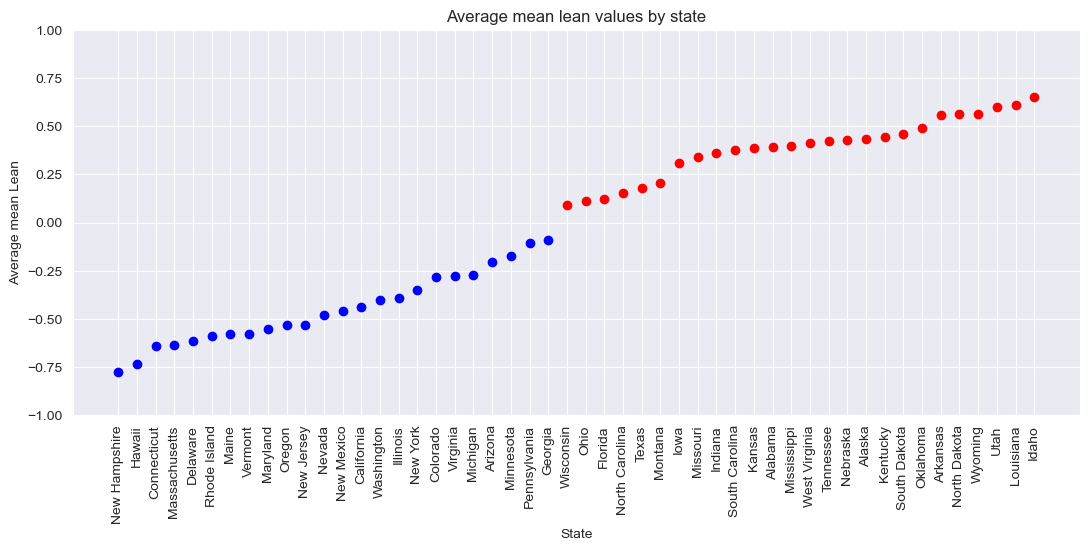

In [96]:
plt.figure(figsize = (13, 5))
plt.scatter(state_lean[state_lean['mean_lean'] <= 0]['state'], state_lean[state_lean['mean_lean'] <= 0]['mean_lean'], c = 'blue')
plt.scatter(state_lean[state_lean['mean_lean'] >= 0]['state'], state_lean[state_lean['mean_lean'] >= 0]['mean_lean'], c = 'red')
plt.xticks(rotation = 90)
plt.xlabel('State')
plt.ylabel('Average mean Lean')
plt.title('Average mean lean values by state')
plt.ylim([-1, 1]);

Notably, when we ranked states based on their average `mean_lean`, we observed that the states with the largest negative average `mean_lean` (i.e. Democratic leaning) are those states that tend to be the ones that are considered to be safe states for the Democratic party (ex. Hawaii), whereas states with the most positive average `mean_lean` (i.e. Republican leaning) are states which are considered safe states for the Republican party (ex. Wyoming). In addition, swing states such as Georgia, Wisconsin and Pennsylvania, have an average `mean_lean` near zero (ie. neither Democratic or Republican leaning).

Interestingly, for the 2020 presidential election, which is a distinct election from the congressional election, the Democratic candidate, Joe Biden, won the same states that have a negative average `mean_lean` value, while the Republican candidate, Donald Trump, won the same states that have a positive average `mean_lean` value as shown in the graph above. This reinforces the validity of use of `lean` values calculated from the congresspersons' Twitter activity.

## 10. Q3: How does education level, age and voter share affect differences in the preferences of domains among US Congresspersons? <a class = "anchor" id = "q3"></a>

The purpose of this section is to understand the influence of education, age and percentage of votes won (i.e. voter share) on domains among US congresspersons. 

### 10.1 Preference of Domains by Education <a class = "anchor" id = "q3_edu"></a>

In [97]:
result_ed = con.execute('''SELECT education, party, Domain, count(Domain) as countDomain
                           FROM twitter
                               INNER JOIN congress
                                   ON twitter.Username = congress.handle
                           GROUP BY Domain, party, state''').fetchall()

result_df_ed = pd.DataFrame(result_ed, columns = ['education', 'party', 'Domain', 'Domain_Count'])
result_df_ed = result_df_ed.sort_values(by = ['Domain_Count'], ascending = False)
result_df_ed_pivot = result_df_ed.pivot_table(index = 'Domain', columns = ['education','party'], values = 'Domain_Count', aggfunc = 'sum')

In [98]:
result_df_ed_pivot.columns = result_df_ed_pivot.columns.set_levels(['Bachelors','Doctorate','Masters', 'None'],level = 0)
result_df_ed_pivot.columns

MultiIndex([('Bachelors', 'Democratic'),
            ('Bachelors', 'Republican'),
            ('Doctorate', 'Democratic'),
            ('Doctorate', 'Republican'),
            (  'Masters', 'Democratic'),
            (  'Masters', 'Republican'),
            (     'None', 'Democratic'),
            (     'None', 'Republican')],
           names=['education', 'party'])

We create dataframes for each party by level of education for clear visualisation. We also output the equivalent proportion for each frequency value.

In [99]:
result_df_pivot_B_democratic = result_df_ed_pivot.sort_values(by=[('Bachelors', 'Democratic')], ascending=False)
result_df_pivot_B_republican = result_df_ed_pivot.sort_values(by=[('Bachelors', 'Republican')], ascending=False)
result_df_pivot_D_democratic = result_df_ed_pivot.sort_values(by=[('Doctorate', 'Democratic')], ascending=False)
result_df_pivot_D_republican = result_df_ed_pivot.sort_values(by=[('Doctorate', 'Republican')], ascending=False)
result_df_pivot_M_democratic = result_df_ed_pivot.sort_values(by=[('Masters', 'Democratic')], ascending=False)
result_df_pivot_M_republican = result_df_ed_pivot.sort_values(by=[('Masters', 'Republican')], ascending=False)
result_df_pivot_N_democratic = result_df_ed_pivot.sort_values(by=[('None', 'Democratic')], ascending=False)
result_df_pivot_N_republican = result_df_ed_pivot.sort_values(by=[('None', 'Republican')], ascending=False)

In [100]:
result_df_pivot_B_democratic[('Bachelors', 'Democratic_ratio')] = result_df_pivot_B_democratic[('Bachelors', 'Democratic')]/result_df_pivot_B_democratic[('Bachelors', 'Democratic')].sum()
result_df_pivot_B_republican[('Bachelors', 'Republican_ratio')] = result_df_pivot_B_republican[('Bachelors', 'Republican')]/result_df_pivot_B_republican[('Bachelors', 'Republican')].sum()
result_df_pivot_D_democratic[('Doctorate', 'Democratic_ratio')] = result_df_pivot_D_democratic[('Doctorate', 'Democratic')]/result_df_pivot_D_democratic[('Doctorate', 'Democratic')].sum()
result_df_pivot_D_republican[('Doctorate', 'Republican_ratio')] = result_df_pivot_D_republican[('Doctorate', 'Republican')]/result_df_pivot_D_republican[('Doctorate', 'Republican')].sum()
result_df_pivot_M_democratic[('Masters', 'Democratic_ratio')] = result_df_pivot_M_democratic[('Masters', 'Democratic')]/result_df_pivot_M_democratic[('Masters', 'Democratic')].sum()
result_df_pivot_M_republican[('Masters', 'Republican_ratio')] = result_df_pivot_M_republican[('Masters', 'Republican')]/result_df_pivot_M_republican[('Masters', 'Republican')].sum()
result_df_pivot_N_democratic[('None', 'Democratic_ratio')] = result_df_pivot_N_democratic[('None', 'Democratic')]/result_df_pivot_N_democratic[('None', 'Democratic')].sum()
result_df_pivot_N_republican[('None', 'Republican_ratio')] = result_df_pivot_N_republican[('None', 'Republican')]/result_df_pivot_N_republican[('None', 'Republican')].sum()

In [101]:
display_side_by_side(result_df_pivot_D_democratic[[('Doctorate', 'Democratic'), ('Doctorate', 'Democratic_ratio')]].head(), result_df_pivot_D_republican[[('Doctorate', 'Republican'), ('Doctorate', 'Republican_ratio')]].head())
display_side_by_side(result_df_pivot_M_democratic[[('Masters', 'Democratic'), ('Masters', 'Democratic_ratio')]].head(), result_df_pivot_M_republican[[('Masters', 'Republican'), ('Masters', 'Republican_ratio')]].head())
display_side_by_side(result_df_pivot_B_democratic[[('Bachelors', 'Democratic'), ('Bachelors', 'Democratic_ratio')]].head(), result_df_pivot_B_republican[[('Bachelors', 'Republican'), ('Bachelors', 'Republican_ratio')]].head())
display_side_by_side(result_df_pivot_N_democratic[[('None', 'Democratic'), ('None', 'Democratic_ratio')]].head(), result_df_pivot_N_republican[[('None', 'Republican'), ('None', 'Republican_ratio')]].head())

education 
 Doctorate 
 
 
 party 
 Democratic 
 Democratic_ratio 
 
 
 Domain 
 
 
 
 
 
 
 washingtonpost 
 3755.0 
 0.073832 
 
 
 nytimes 
 3558.0 
 0.069958 
 
 
 cnn 
 1809.0 
 0.035569 
 
 
 thehill 
 1123.0 
 0.022081 
 
 
 nbcnews 
 1092.0 
 0.021471 
 
 
 
 
 
 education 
 Doctorate 
 
 
 party 
 Republican 
 Republican_ratio 
 
 
 Domain 
 
 
 
 
 
 
 foxnews 
 3638.0 
 0.113333 
 
 
 wsj 
 1990.0 
 0.061994 
 
 
 nypost 
 926.0 
 0.028847 
 
 
 foxbusiness 
 871.0 
 0.027134 
 
 
 washingtonexaminer 
 795.0 
 0.024766

education 
 Masters 
 
 
 party 
 Democratic 
 Democratic_ratio 
 
 
 Domain 
 
 
 
 
 
 
 washingtonpost 
 457.0 
 0.035595 
 
 
 nytimes 
 409.0 
 0.031856 
 
 
 dallasnews 
 334.0 
 0.026014 
 
 
 detroitnews 
 258.0 
 0.020095 
 
 
 orlandosentinel 
 256.0 
 0.019939 
 
 
 
 
 
 education 
 Masters 
 
 
 party 
 Republican 
 Republican_ratio 
 
 
 Domain 
 
 
 
 
 
 
 foxnews 
 715.0 
 0.076056 
 
 
 politico 
 343.0 
 0.036485 
 
 
 wsj 
 268.0 
 0.028508 
 
 
 foxbusiness 
 199.0 
 0.021168 
 
 
 thehill 
 198.0 
 0.021062

education 
 Bachelors 
 
 
 party 
 Democratic 
 Democratic_ratio 
 
 
 Domain 
 
 
 
 
 
 
 washingtonpost 
 1017.0 
 0.074527 
 
 
 nytimes 
 902.0 
 0.066100 
 
 
 cnn 
 661.0 
 0.048439 
 
 
 seattletimes 
 383.0 
 0.028067 
 
 
 thehill 
 371.0 
 0.027187 
 
 
 
 
 
 education 
 Bachelors 
 
 
 party 
 Republican 
 Republican_ratio 
 
 
 Domain 
 
 
 
 
 
 
 foxnews 
 2550.0 
 0.145258 
 
 
 wsj 
 966.0 
 0.055027 
 
 
 foxbusiness 
 665.0 
 0.037881 
 
 
 washingtonexaminer 
 421.0 
 0.023982 
 
 
 thehill 
 397.0 
 0.022615

education 
 None 
 
 
 party 
 Democratic 
 Democratic_ratio 
 
 
 Domain 
 
 
 
 
 
 
 ushr 
 51.0 
 0.054140 
 
 
 nytimes 
 43.0 
 0.045648 
 
 
 santacruzsentinel 
 43.0 
 0.045648 
 
 
 washingtonpost 
 36.0 
 0.038217 
 
 
 go 
 29.0 
 0.030786 
 
 
 
 
 
 education 
 None 
 
 
 party 
 Republican 
 Republican_ratio 
 
 
 Domain 
 
 
 
 
 
 
 wsj 
 243.0 
 0.102575 
 
 
 foxnews 
 189.0 
 0.079780 
 
 
 apple 
 103.0 
 0.043478 
 
 
 nbcwashington 
 102.0 
 0.043056 
 
 
 newsbreakapp 
 97.0 
 0.040946

#### 10.1.1 Bar Plots of Domains by Education and Party using Absolute Frequency <a class = "anchor" id = "q3_edu1"></a>

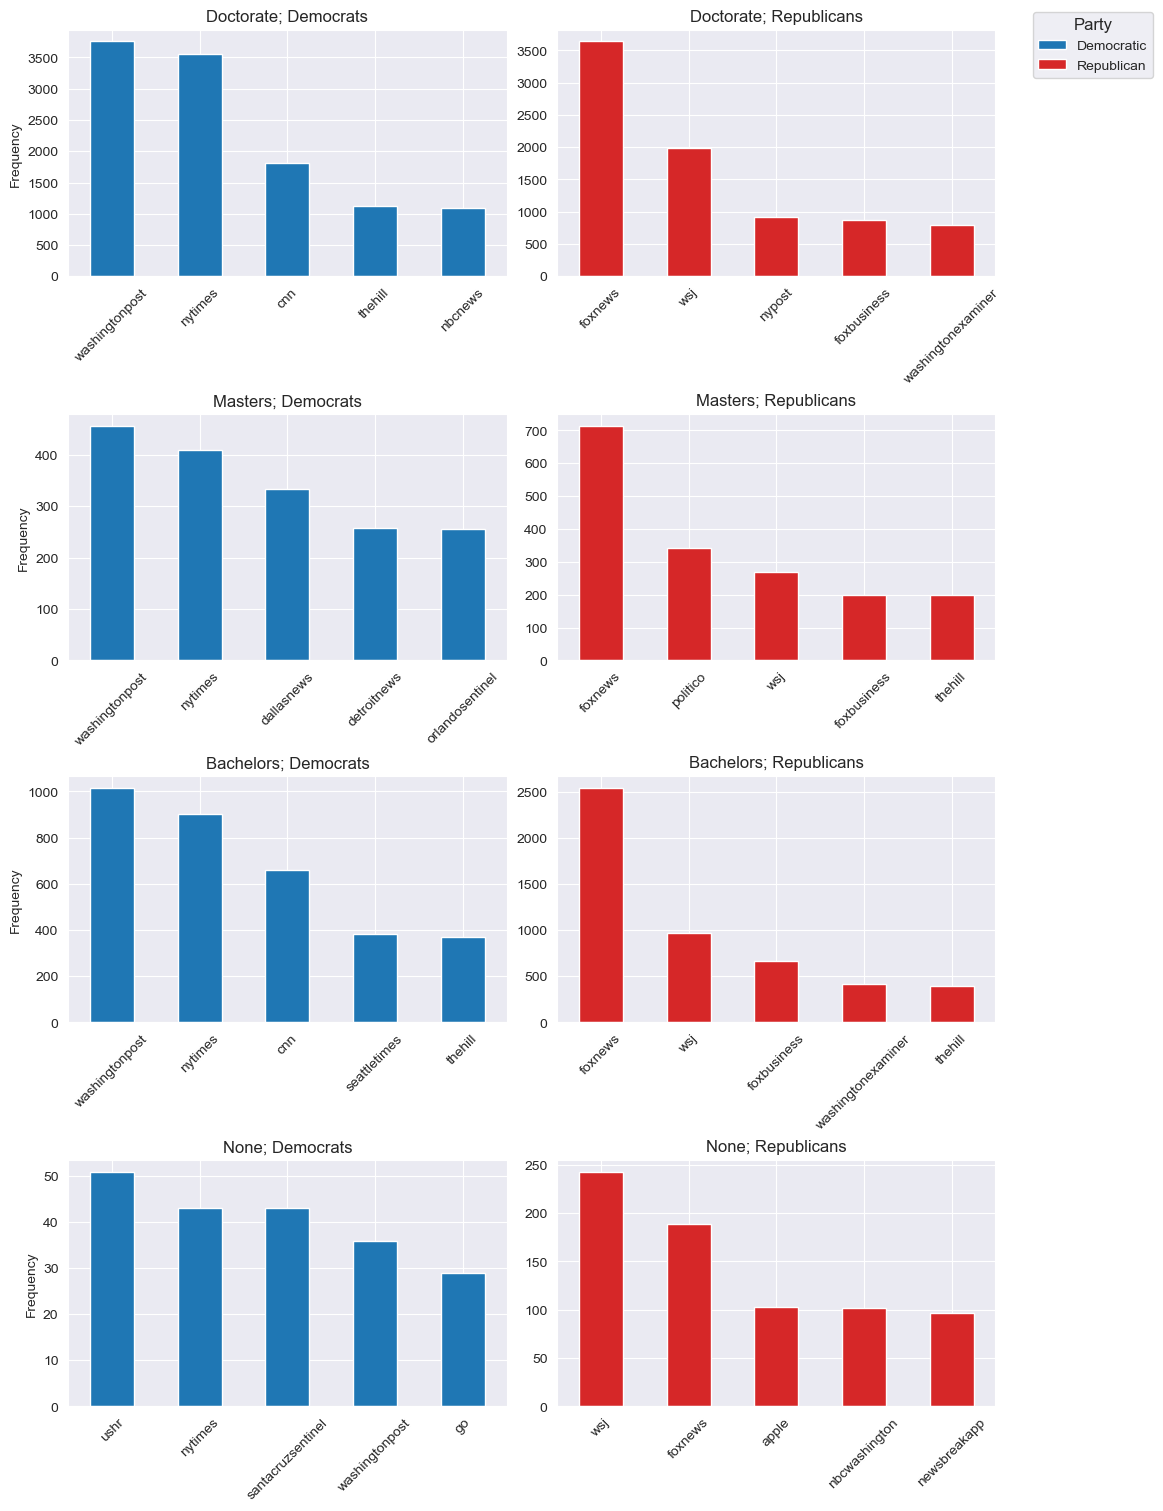

In [102]:
fig, ax = plt.subplots(4,2, figsize = (10, 15), constrained_layout=True)

result_df_pivot_D_democratic[('Doctorate', 'Democratic')].head().plot(ax = ax[0,0], kind='bar')
result_df_pivot_D_republican[('Doctorate', 'Republican')].head().plot(ax = ax[0,1], kind='bar', color=['tab:red'])
result_df_pivot_M_democratic[('Masters', 'Democratic')].head().plot(ax = ax[1,0], kind='bar')
result_df_pivot_M_republican[('Masters', 'Republican')].head().plot(ax = ax[1,1], kind='bar', color=['tab:red'])
result_df_pivot_B_democratic[('Bachelors', 'Democratic')].head().plot(ax = ax[2,0], kind='bar')
result_df_pivot_B_republican[('Bachelors', 'Republican')].head().plot(ax = ax[2,1], kind='bar', color=['tab:red'])
result_df_pivot_N_democratic[('None', 'Democratic')].head().plot(ax = ax[3,0], kind='bar')
result_df_pivot_N_republican[('None', 'Republican')].head().plot(ax = ax[3,1], kind='bar', color=['tab:red'])

ax[0,0].set(ylabel='Frequency')
ax[1,0].set(ylabel='Frequency')
ax[2,0].set(ylabel='Frequency')
ax[3,0].set(ylabel='Frequency')

ax[0,0].title.set_text('Doctorate; Democrats')
ax[0,1].title.set_text('Doctorate; Republicans')
ax[1,0].title.set_text('Masters; Democrats')
ax[1,1].title.set_text('Masters; Republicans')
ax[2,0].title.set_text('Bachelors; Democrats')
ax[2,1].title.set_text('Bachelors; Republicans')
ax[3,0].title.set_text('None; Democrats')
ax[3,1].title.set_text('None; Republicans')


for i in range(4):
    for j in range(2):
        ax[i,j].tick_params(axis='x', rotation=45)
        
for i in range(4):
    for j in range(2):
        ax[i,j].set(xlabel=None)
        
fig.legend(loc='upper right', labels=['Democratic', 'Republican'], title='Party', title_fontsize='12')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1.02, 1))

There are some patterns observed across educational levels by party affiliation. Democratic congresspersons of all education levels rely on the `washingtonpost` and `nytimes` as one of their five most frequently used sources, whereas Republican congresspersons rely on `foxnews` and `wsj` across all educational levels.

#### 10.1.2 Scatter Plot of the Individual Mean Lean Values by Education <a class = "anchor" id = "q3_edu2"></a>

100%|████████████████████████████████████████| 533/533 [00:00<00:00, 619.96it/s]


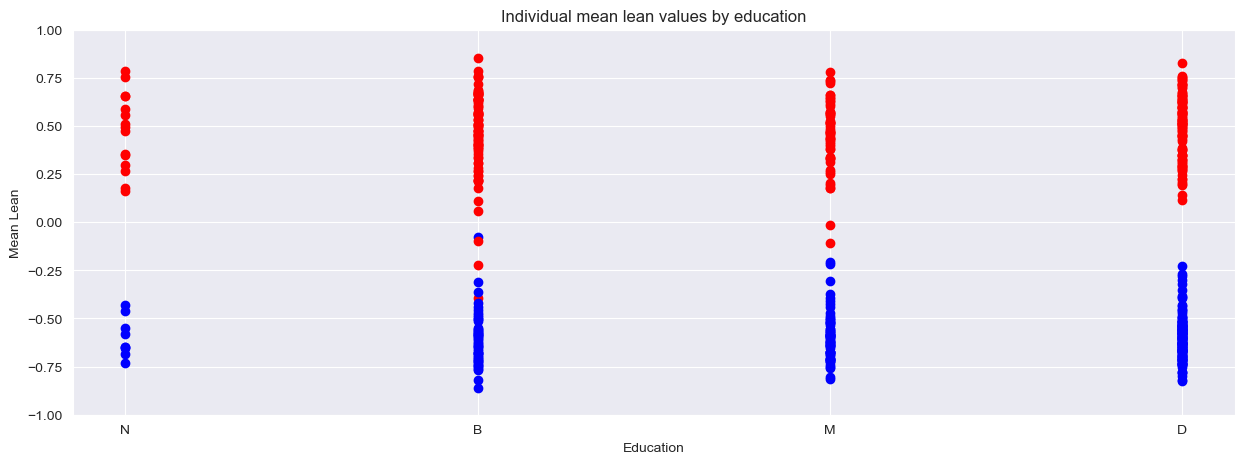

In [103]:
plt.figure(figsize = (15, 5))
for i in ['N', 'B', 'M', 'D']:
    plt.scatter(i, 0, s = 0)
for i in tqdm(range(len(congress))):
    if pd.isna(congress.loc[i, 'mean_lean']):
        pass
    else:
        if congress.loc[i, 'party'] == 'Democratic':
            plt.scatter(congress.loc[i, 'education'], congress.loc[i, 'mean_lean'], c = 'blue')
        if congress.loc[i, 'party'] == 'Republican':
            plt.scatter(congress.loc[i, 'education'], congress.loc[i, 'mean_lean'], c = 'red')
plt.xlabel('Education')
plt.ylabel('Mean Lean')
plt.ylim([-1, 1])
plt.title('Individual mean lean values by education');

#### 10.1.3 Line Plot of the Average Mean Lean Values by Education <a class = "anchor" id = "q3_edu3"></a>

In [104]:
# calculate the average mean lean by education
education_lean = congress.groupby('education')[['mean_lean']].mean().reset_index(drop = False)
education_lean['education'] = pd.Categorical(education_lean['education'], ['N', 'B', 'M', 'D'])
education_lean = education_lean.sort_values('education')
education_lean

,education,mean_lean
3,N,0.070812
0,B,0.058917
2,M,-0.125207
1,D,-0.144493


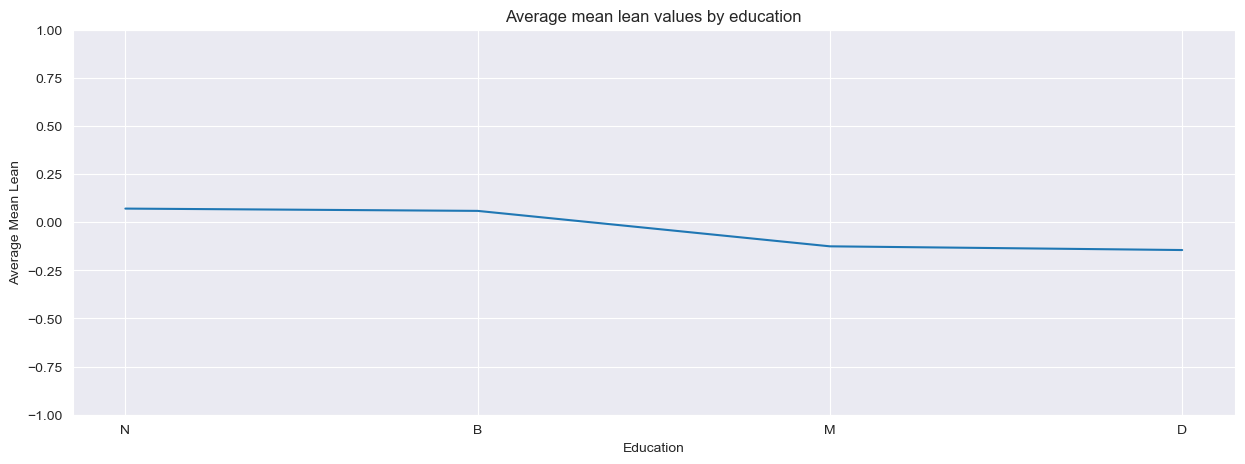

In [105]:
plt.figure(figsize = (15, 5))
plt.plot(education_lean['education'], education_lean['mean_lean'])
plt.xlabel('Education')
plt.ylabel('Average Mean Lean')
plt.ylim([-1, 1])
plt.title('Average mean lean values by education');

We also observe that the average `mean_lean` is slightly positive for US congresspersons with lower educational attainment (i.e. Bachelors degree and below Bachelors degree) and slightly negative for those with higher educational attainment (i.e. Doctorate and Masters degree) albiet the absolute difference from zero is small.

### 10.2 Relationship between the Mean Lean Values and Age <a class = "anchor" id = "q3_age"></a>

#### 10.2.1 Scatter Plot of the Individual Mean Lean Values by Age <a class = "anchor" id = "q3_age1"></a>

100%|████████████████████████████████████████| 533/533 [00:00<00:00, 740.83it/s]


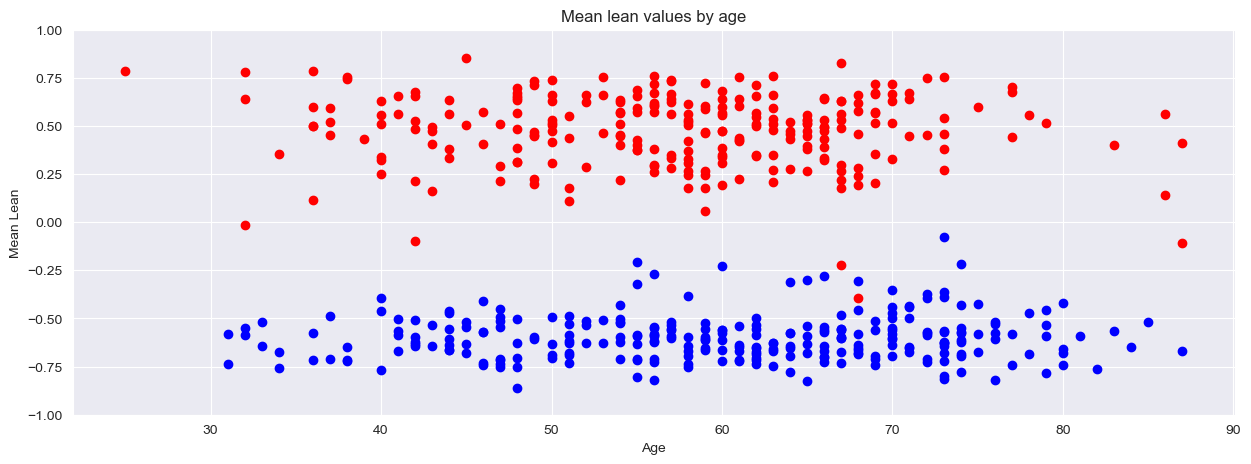

In [106]:
plt.figure(figsize = (15, 5))
for i in tqdm(range(len(congress))):
    if pd.isna(congress.loc[i, 'mean_lean']):
        pass
    else:
        if congress.loc[i, 'party'] == 'Democratic':
            plt.scatter(congress.loc[i, 'age_start'], congress.loc[i, 'mean_lean'], c = 'blue')
        if congress.loc[i, 'party'] == 'Republican':
            plt.scatter(congress.loc[i, 'age_start'], congress.loc[i, 'mean_lean'], c = 'red')
plt.xlabel('Age')
plt.ylabel('Mean Lean')
plt.ylim([-1, 1])
plt.title('Mean lean values by age');

Our analysis of the `mean_lean` values by party affiliation across ages in the above plot does not reveal any significant relation with age.

#### 10.2.2 Line Plot of the Average Mean Lean Values by Age <a class = "anchor" id = "q3_age2"></a>

In [107]:
age_lean = congress.groupby('age_start')[['mean_lean']].mean().reset_index(drop = False).dropna()

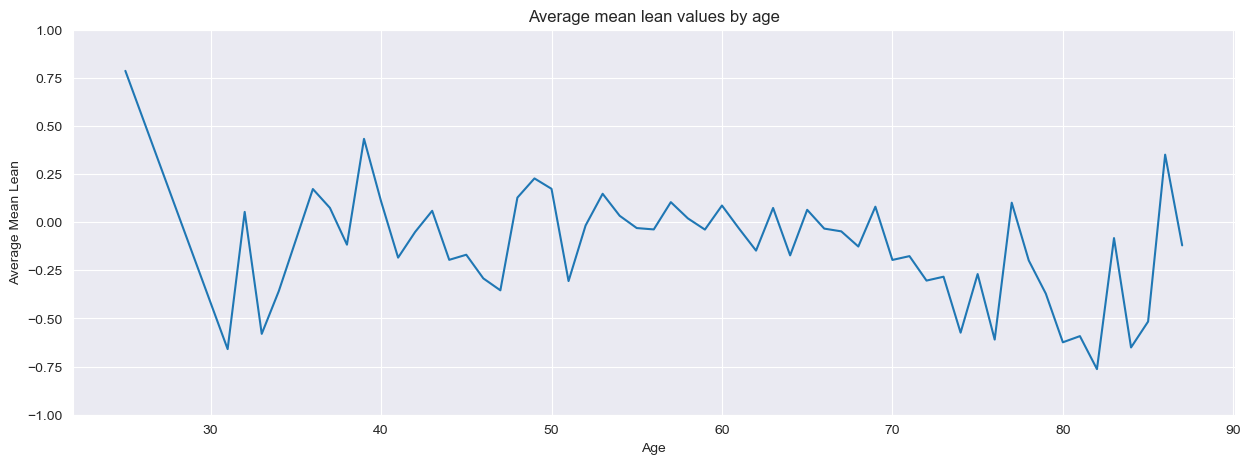

In [108]:
plt.figure(figsize = (15, 5))
plt.plot(age_lean['age_start'], age_lean['mean_lean'])
plt.xlabel('Age')
plt.ylabel('Average Mean Lean')
plt.ylim([-1, 1])
plt.title('Average mean lean values by age');

Based on this plot, we came to the same conclusion that there is hardly any correlation between the average `mean_lean` and age.

One thing to note is that, at both ends of the age spectrum, the line graph is slightly noiser compared to the middle portion. This is due to the fact that there are fewer congresspersons in those age groups.

### 10.3 Relationship between the Mean Lean Values by Vote Share <a class = "anchor" id = "q3_vote"></a>

#### 10.3.1 Scatter Plot of the Individual Mean Lean Values by Vote Share <a class = "anchor" id = "q3_vote1"></a>

100%|████████████████████████████████████████| 533/533 [00:00<00:00, 641.32it/s]


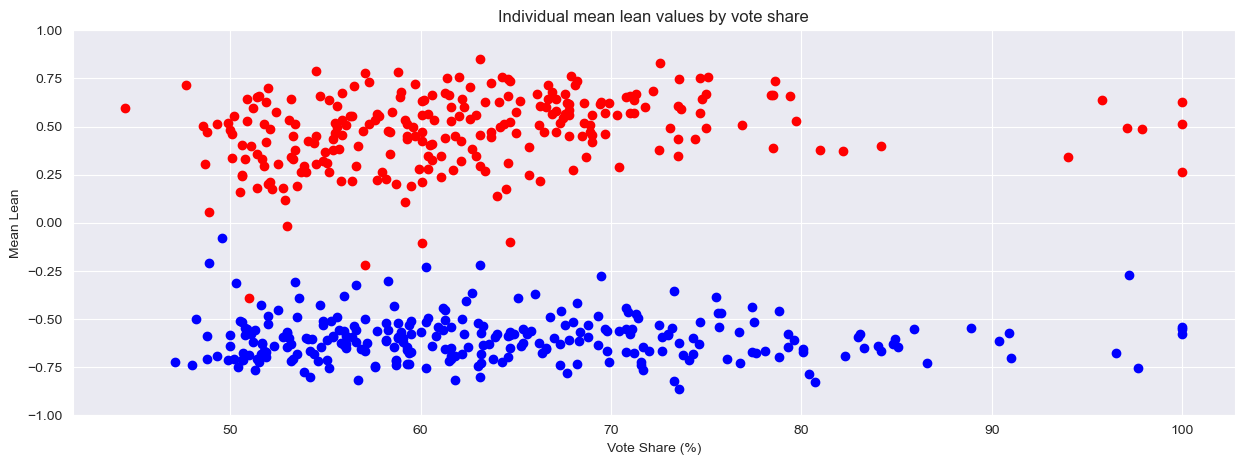

In [109]:
plt.figure(figsize = (15, 5))
for i in tqdm(range(len(congress))):
    if pd.isna(congress.loc[i, 'mean_lean']):
        pass
    else:
        if congress.loc[i, 'party'] == 'Democratic':
            plt.scatter(congress.loc[i, 'vote_share (%)'], congress.loc[i, 'mean_lean'], c = 'blue')
        if congress.loc[i, 'party'] == 'Republican':
            plt.scatter(congress.loc[i, 'vote_share (%)'], congress.loc[i, 'mean_lean'], c = 'red')
plt.xlabel('Vote Share (%)')
plt.ylabel('Mean Lean')
plt.ylim([-1, 1])
plt.title('Individual mean lean values by vote share');

We expected that congresspersons that won a higher percentage of votes would be more partisan in their choices of domains tweeted. Conversely, we expected that congresspersons that won a lower percentage of vote shares would be more diverse in their choices of domains tweeted. Essentially, we expected a clearer 'C' shaped curve on this plot.

An observation that supports what we expected is that, all congresspersons that have an individual `mean_lean` between `-0.25` and `0.25`, only have a vote share of less than `70%`.

In [110]:
# disconnect from database
con.close()

## 11. Conclusion <a class = "anchor" id = "conclusion"></a>

In conclusion, this project reveals the bias in news sources utilised by US congresspersons. Notably, we find that the news sources used by US congresspersons are clearly different according to their party affiliation. For example, the domain `foxnews` is the top domain used by Republican congresspersons, but it is not even in the top 50 domains used by Democratic congresspersons. Yet, in theory, news sources should provide unbiased information to the public. However, researchers have examined the Twitter behavior of members of Congress during the 2016 election cycle and found that Republican members were more prone to follow conservative news sources and Democratic members were more likely to follow liberal news sources.<sup>7</sup> A study published in the journal Political Communication in 2019 examined the content of tweets made by members of Congress during the same period. Democrats were more likely to tweet about liberal issues and use liberal language, while Republicans were more likely to tweet about conservative issues and use conservative language.<sup>8</sup> Our study further adds to the evidence on the bias between political affiliation and Tweets. 

It was also revealed in this study that it was possible to use the relationship between news source and party affiliation as an indicator for the state represented. There are two types of states in American politics: "safe states" that vote primarily for one political party, and "swing states" that vote for either party based on the election cycle.<sup>9</sup> In our study, we find that states where US congresspersons use more "biased" news sources tend to be "safe states" while states where US congresspersons use more "neutral" news sources tend to be "swing states".


Furthermore, if politicians tweet biased news sources, it is unclear whether this is the result of other factors (e.g. demographics and margin of victory) or whether party affiliation plays a primary role. In particular, we did not observe dramatic differences by educational level, age and voter share. Nonetheless, we observed that some news sources were fairly consistent across educational levels and political affiliations. Also, Democrats have a slightly higher mean age than Republicans, which may explain the slight bias toward the Democratic party with age. Interestingly, the results for voter share were not as strongly consistent to our hypothesis that US congresspersons with a larger vote share would use sources that were more politically biased. That being said, in the future, it would be interesting to develop a model to determine whether party affiliation is associated with news sources after adjusting for potential confounders.

Our study has several limitations. First, due to the large number of domains, we are unable to determine whether each domain represents a news source. Thus, some of the domains obtained may actually be social media websites or sources other than news reports. Second, based on the scraping tools, we were unable to obtain the retweets and links associated with quotes. This may result in a selection bias in our dataset if they are not missing at random and are biased towards one party in particular. In addition, we did not use the number of outlinks by the Twitter handle to weigh the count or `lean` of each domain. This may skew the results by congresspersons who have a greater number of outlinks in comparison to their peers. 

Therefore, it may be helpful in the future to collect a more precise and comprehensive data from Twitter, and to use models that reflect the impact of party affiliations and other factors on the political bias of news sources more accurately.

## 12. References <a class = "anchor" id = "ref"></a>

1. Sundquist, James L. Dynamics of the party system: Alignment and realignment of political parties in the United States. Brookings Institution Press, 2011.
2. Gallup and Knights Foundation. Percieved Accuracy and Bias in the News Media. 2018. https://knightfoundation.org/wp-content/uploads/2020/03/KnightFoundation_AccuracyandBias_Report_FINAL.pdf
3. Gregory J. Martin and  Josh McCrain. Yes, Sinclair Broadcast Group does cut local news, increase national news and tilt its stations rightward. Washington Post, 2018. https://www.washingtonpost.com/news/monkey-cage/wp/2018/04/10/yes-sinclair-broadcast-group-does-cut-local-news-increase-national-news-and-tilt-its-stations-rightward/
4. Jaclyn Diaz. Louisiana Congressman-Elect Dies From COVID-19. NPR, 2020. https://www.npr.org/2020/12/30/951332740/louisiana-congressman-elect-dies-after-battling-covid-19
5. Ben Kamisar. Republican Claudia Tenney to return to Congress after election finally certified. NBC News, 2021. https://www.nbcnews.com/politics/meet-the-press/blog/meet-press-blog-latest-news-analysis-data-driving-political-discussion-n988541/ncrd1257074#blogHeader
6. JustAnotherArchivist. Snscrape: A social networking service scraper in Python. https://github.com/JustAnotherArchivist/snscrape 
7. Dubois, Elizabeth, and Grant Blank. "The echo chamber is overstated: the moderating effect of political interest and diverse media." Information, communication & society 21.5 (2018): 729-745.
8. Yang, JungHwan, and Travis N. Ridout. "The Language of Legislative Partisanship: A Mapping of Congressional Tweets." Political Communication, vol. 36, no. 3, July-September 2019, pp. 428-450.
9. Lax, Jared. "Swingers: How Presidential Nominees Build Successful Campaigns in Swing States." (2015).
